# Binary label

In [2]:
# import pandas as pd
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# from sklearn.metrics import precision_score, recall_score, f1_score
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# import pandas as pd
# import os

# # Đường dẫn đến thư mục chứa các file CSV
# folder_path = '/kaggle/input/data-low-rate/hour'

# # Danh sách chứa tất cả các DataFrame
# all_dataframes = []

# # Lặp qua tất cả các file CSV trong thư mục
# # for file_name in os.listdir(folder_path):
# #     if file_name.endswith('.csv'):
# #         file_path = os.path.join(folder_path, file_name)
# #         df = pd.read_csv(file_path)
# #         all_dataframes.append(df)

# # daily
# for folder in os.listdir(folder_path):
#     if folder == "merge":
#         continue
#     for file_name in os.listdir(os.path.join(folder_path,folder)):
#         if file_name.endswith('.csv'):
#             file_path = os.path.join(folder_path, folder,file_name)
#             df = pd.read_csv(file_path)
#             all_dataframes.append(df)
# # print(all_dataframes)

# # Gộp tất cả các DataFrame lại
# merged_df = pd.concat(all_dataframes, ignore_index=True)
# # Lưu DataFrame gộp vào một file CSV mới
# merged_df.to_csv('merged_file.csv', index=False)

# # Đọc dữ liệu từ tệp CSV
# file_path = "/kaggle/working/merged_file.csv"
# df = pd.read_csv(file_path)

# # Lựa chọn các đặc trưng: thời gian, nhiệt độ, kinh độ, vĩ độ
# # Chuyển đổi cột thời gian thành số (giả sử là số giờ từ đầu ngày)
# df['time'] = pd.to_datetime(df['time'])
# df['hour'] = df['time'].dt.hour

# # Chuyển đổi cột thời gian thành định dạng datetime
# df['time'] = pd.to_datetime(df['time'])

# # Chọn một ngày mốc
# epoch = pd.Timestamp('2022-01-01')

# # Tính toán số ngày từ ngày mốc và cộng thêm số giờ
# df['time_numeric'] = (df['time'] - epoch).dt.days + df['time'].dt.hour/24
# df['t2m'] +=273
# df['longitude'] += 100
# df["latitude"] += 100
# # Chọn các cột đặc trưng và nhãn
# features = df[['t2m','longitude',"latitude", 'time_numeric']].values
# # features = df['t2m'].values.reshape(-1, 1)
# labels = df['Fault_Label'].values.astype("float32")  # Hoặc 'Fault_Type'
# # labels = df['Fault_Type'].values  # Hoặc 'Fault_Label'
# # print(features[:30])
# # print(df['t2m'])
# # # Chuẩn hóa dữ liệu
# scaler = StandardScaler()
# # scaler=MinMaxScaler(feature_range=(0, 1))
# features = scaler.fit_transform(features)
# # # print(features[:30])
# sequence_length = 72
# # sequences = []
# # labels = []

# # # Iterate through the DataFrame in steps of `sequence_length` to avoid overlap
# # for i in range(0, len(df), sequence_length):
# #     # Check if there are enough data points left for a full sequence
# #     if i + sequence_length <= len(df):
# #         # Create a sequence of 5 consecutive data points as a 2D array (5x4)
# #         sequence = df.iloc[i:i+sequence_length][["t2m"]].values
# #         sequences.append(sequence)
        
# #         # Determine the label based on Fault_Label in the 5-point sequence
# #         label = 1 if df.iloc[i:i+sequence_length]["Fault_Label"].max() == 1 else 0
# #         labels.append(label)

# # # Convert to NumPy arrays for easier handling
# # X_seq = np.array(sequences)
# # y_seq = np.array(labels)


# # features = features.reshape(-1)
# num_samples = len(features) - sequence_length + 1

# #Non - overlap
# X_seq = np.array([features[i*sequence_length:(i+1)*sequence_length] for i in range(num_samples//sequence_length)])
# y_seq = np.array([max(labels[i*sequence_length:(i+1)*sequence_length]) for i in range(num_samples//sequence_length)])

# #Overlap
# # X_seq = np.array([features[i:i+sequence_length] for i in range(num_samples)])
# # y_seq = np.array([max(labels[i:i+sequence_length]) for i in range(num_samples)])
# y_seq = np.expand_dims(y_seq,axis=1)
# # print(y_seq.shape)
# # # Splitting the data
# split_ratio = 0.1
# split_index = int(num_samples//sequence_length * split_ratio)
# # X_train, X_test = X_seq[split_index:], X_seq[:split_index]
# # y_train, y_test = y_seq[split_index:], y_seq[:split_index]

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.1, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


# # Converting to Tensors
# X_train_tensor = torch.FloatTensor(X_train)
# y_train_tensor = torch.FloatTensor(y_train)
# X_test_tensor = torch.FloatTensor(X_test)
# y_test_tensor = torch.FloatTensor(y_test)
# X_val_tensor = torch.FloatTensor(X_val)
# y_val_tensor = torch.FloatTensor(y_val)


# # Creating TensorDataset and DataLoader
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# # Verify batch shape
# for X_batch, y_batch in train_loader:
#     print("Feature batch:", X_batch.shape)  # Should output [64, 5, 4]
#     print("Label batch:", y_batch.shape)    # Should output [64]
#     # print(X_batch)
#     break

Feature batch: torch.Size([64, 72, 4])
Label batch: torch.Size([64, 1])


## Tuning

hidden_size: 16 num_layers: 3
Epoch:0, Loss: 0.6933, Accuracy:0.5066 
Epoch:100, Loss: 0.6582, Accuracy:0.5461 
Epoch:200, Loss: 0.6407, Accuracy:0.5592 
Epoch:300, Loss: 0.6266, Accuracy:0.5658 
hidden_size: 16 num_layers: 5
Epoch:0, Loss: 0.6951, Accuracy:0.5592 
Epoch:100, Loss: 0.6605, Accuracy:0.5789 
Epoch:200, Loss: 0.6519, Accuracy:0.5132 
Epoch:300, Loss: 0.6155, Accuracy:0.6447 
hidden_size: 16 num_layers: 7
Epoch:0, Loss: 0.6946, Accuracy:0.5066 
Epoch:100, Loss: 0.6603, Accuracy:0.5329 
Epoch:200, Loss: 0.6586, Accuracy:0.5592 
Epoch:300, Loss: 0.4344, Accuracy:0.8224 
hidden_size: 32 num_layers: 3
Epoch:0, Loss: 0.6949, Accuracy:0.5066 
Epoch:100, Loss: 0.6583, Accuracy:0.5263 
Epoch:200, Loss: 0.2414, Accuracy:0.8487 
Epoch:300, Loss: 0.1679, Accuracy:0.8684 
hidden_size: 32 num_layers: 5
Epoch:0, Loss: 0.6943, Accuracy:0.5132 
Epoch:100, Loss: 0.6565, Accuracy:0.5658 
Epoch:200, Loss: 0.6621, Accuracy:0.5658 
Epoch:300, Loss: 0.6210, Accuracy:0.6316 
hidden_size: 32 num_

/tmp/ipykernel_30/513133126.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))


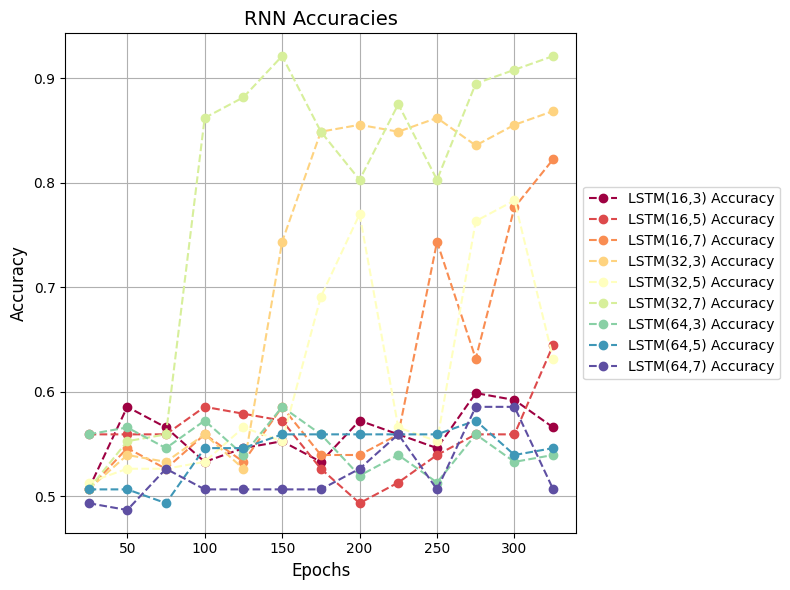

In [91]:
# import torch
# import torch.nn as nn

# class RNNClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(RNNClassifier, self).__init__()
#         self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()  # For binary classification

#     def forward(self, x):
#         # x: [batch_size, sequence_length, input_size]
#         _, h_n = self.rnn(x)  # h_n: [num_layers, batch_size, hidden_size]
#         h_n = h_n[-1]  # Take the output of the last RNN layer
#         output = self.fc(h_n)  # Pass through fully connected layer
#         output = self.sigmoid(output)  # Sigmoid activation for binary output
#         return output

# # Parameters
# input_size = 4  # Number of features per time step
# hidden_size_l = [16,32,64]  # Number of features in the hidden state
# num_layers_l = [3,5,7]  # Number of RNN layers
# output_size = 1  # Binary classification

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# criterion = nn.BCELoss()
# accuracies_summarize=[]
# for hidden_size in hidden_size_l:
#     for num_layers in num_layers_l:
#         rnn_model = RNNClassifier(input_size, hidden_size, num_layers, output_size)
#         print("hidden_size:",hidden_size,"num_layers:",num_layers)
#         optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
#         # Move model to the appropriate device
#         rnn_model = rnn_model.to(device)
#         # Fake data
#         # Instantiate model, loss, and optimizer
#         epochs =301
#         accuracies_rnn=[]
#         for epoch in range(epochs):
#             epoch_loss =0
#             for X_batch, y_batch in train_loader:
#                 # Training step
#                 X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#                 rnn_model.train()
#                 optimizer.zero_grad()
#                 output = rnn_model(X_batch)  # Forward pass
#                 loss = criterion(output, y_batch)  # Compute loss
#                 loss.backward()  # Backward pass
#                 optimizer.step()  # Update weights
#                 epoch_loss+=loss.item()
#             if epoch %25==0:
#                 all_y_pred_classes = []
#                 all_y_test_classes = []
#                 rnn_model.eval()
#                 with torch.no_grad():
#                     for X_batch, y_batch in val_loader:
#                         # Move inputs and labels to the appropriate device
#                         X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#                         # Get predictions
#                         y_pred = rnn_model(X_batch)
#                         y_pred_classes = (y_pred >= 0.5).float()
#                         # Collect predictions and true labels for overall metrics
#                         all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#                         all_y_test_classes.extend(y_batch.cpu().numpy())
#                 accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
#                 accuracies_rnn.append(accuracy)
                
#             if epoch %100==0:
#                 print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")
#         accuracies_summarize.append(accuracies_rnn)

# cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))
# plt.figure(figsize=(8, 6))
# idx =0
# for hidden_size in hidden_size_l:
#     for num_layers in num_layers_l:
#         accuracies_rnn = accuracies_summarize[idx]
#         epochs = [25 * i for i in range(1, len(accuracies_rnn) + 1)]
#         plt.plot(epochs, accuracies_rnn, label=f'RNN({hidden_size},{num_layers}) Accuracy',color=cmap(idx), marker='o', linestyle='--')
#         idx +=1
# # Adding labels and title
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.title('RNN Accuracies', fontsize=14) 
# plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
# plt.grid(True)

# # Show the plot
# plt.tight_layout() 
# plt.show()

hidden_size: 16 num_layers: 3
Epoch:99, Loss: 0.5726, Accuracy:0.5592 
Epoch:199, Loss: 0.5146, Accuracy:0.6184 
Epoch:299, Loss: 0.3883, Accuracy:0.7434 
hidden_size: 16 num_layers: 5
Epoch:99, Loss: 0.6107, Accuracy:0.5658 
Epoch:199, Loss: 0.5269, Accuracy:0.6250 
Epoch:299, Loss: 0.4664, Accuracy:0.6776 
hidden_size: 16 num_layers: 7
Epoch:99, Loss: 0.6504, Accuracy:0.5658 
Epoch:199, Loss: 0.5727, Accuracy:0.5855 
Epoch:299, Loss: 0.5022, Accuracy:0.5987 
hidden_size: 32 num_layers: 3
Epoch:99, Loss: 0.5740, Accuracy:0.5197 
Epoch:199, Loss: 0.1939, Accuracy:0.9079 
Epoch:299, Loss: 0.1115, Accuracy:0.9145 
hidden_size: 32 num_layers: 5
Epoch:99, Loss: 0.5236, Accuracy:0.5263 
Epoch:199, Loss: 0.1063, Accuracy:0.9539 
Epoch:299, Loss: 0.0468, Accuracy:0.9539 
hidden_size: 32 num_layers: 7
Epoch:99, Loss: 0.6461, Accuracy:0.4803 
Epoch:199, Loss: 0.5878, Accuracy:0.5395 
Epoch:299, Loss: 0.5693, Accuracy:0.5592 
hidden_size: 64 num_layers: 3
Epoch:99, Loss: 0.5935, Accuracy:0.5197 

/tmp/ipykernel_30/2499885192.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))


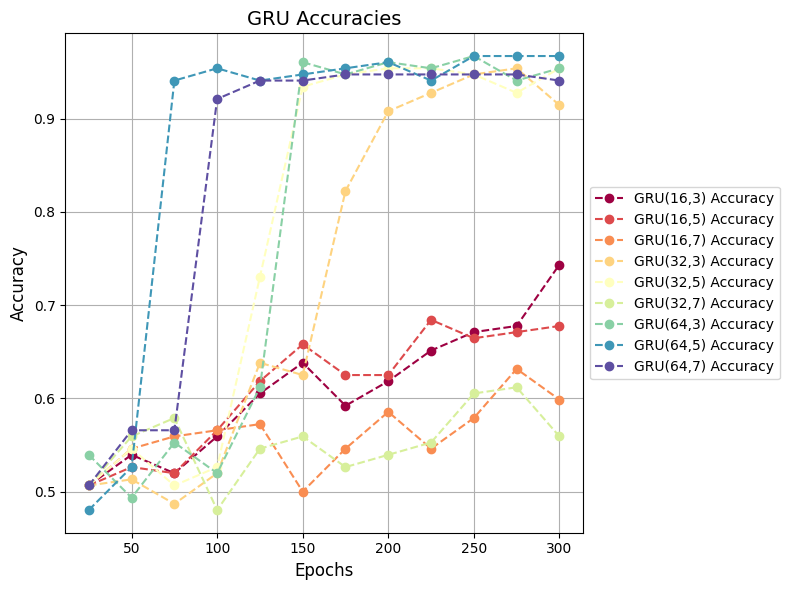

In [92]:
# class GRUClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(GRUClassifier, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()  # For binary classification

#     def forward(self, x):
#         # x: [batch_size, sequence_length, input_size]
#         _, h_n = self.gru(x)  # h_n: [num_layers, batch_size, hidden_size]
#         h_n = h_n[-1]  # Take the output of the last GRU layer
#         output = self.fc(h_n)  # Pass through fully connected layer
#         output = self.sigmoid(output)  # Sigmoid activation for binary output
#         return output

# # Parameters
# input_size = 4  # Number of features per time step
# hidden_size_l = [16,32,64]  # Number of features in the hidden state
# num_layers_l = [3,5,7]  # Number of GRU layers
# output_size = 1# Binary classification

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# criterion = nn.BCELoss()
# accuracies_summarize=[]
# for hidden_size in hidden_size_l:
#     for num_layers in num_layers_l:
#         gru_model = GRUClassifier(input_size, hidden_size, num_layers, output_size)
#         print("hidden_size:",hidden_size,"num_layers:",num_layers)
#         optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
#         # Move model to the appropriate device
#         gru_model = gru_model.to(device)
#         # Fake data
#         # Instantiate model, loss, and optimizer
#         epochs =300
#         accuracies_gru=[]
#         for epoch in range(epochs):
#             epoch_loss =0
#             for X_batch, y_batch in train_loader:
#                 # Training step
#                 X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#                 gru_model.train()
#                 optimizer.zero_grad()
#                 output = gru_model(X_batch)  # Forward pass
#                 loss = criterion(output, y_batch)  # Compute loss
#                 loss.backward()  # Backward pass
#                 optimizer.step()  # Update weights
#                 epoch_loss+=loss.item()
#             if epoch %25==0:
#                 all_y_pred_classes = []
#                 all_y_test_classes = []
#                 gru_model.eval()
#                 with torch.no_grad():
#                     for X_batch, y_batch in val_loader:
#                         # Move inputs and labels to the appropriate device
#                         X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#                         # Get predictions
#                         y_pred = gru_model(X_batch)
#                         y_pred_classes = (y_pred >= 0.5).float()
#                         # Collect predictions and true labels for overall metrics
#                         all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#                         all_y_test_classes.extend(y_batch.cpu().numpy())
#                 accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
#                 accuracies_gru.append(accuracy)
                
#             if (epoch+1) %100==0:
#                 print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")
#         accuracies_summarize.append(accuracies_gru)

# cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))
# plt.figure(figsize=(8, 6))
# idx =0
# for hidden_size in hidden_size_l:
#     for num_layers in num_layers_l:
#         accuracies_gru = accuracies_summarize[idx]
#         epochs = [25 * i for i in range(1, len(accuracies_gru) + 1)]
#         plt.plot(epochs, accuracies_gru, label=f'GRU({hidden_size},{num_layers}) Accuracy',color=cmap(idx), marker='o', linestyle='--')
#         idx +=1
# # Adding labels and title
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.title('GRU Accuracies', fontsize=14) 
# plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
# plt.grid(True)

# # Show the plot
# plt.tight_layout() 
# plt.show()

hidden_size: 64 num_layers: 3
Epoch:0, Loss: 0.6918, Accuracy:0.5461 
Epoch:100, Loss: 0.6515, Accuracy:0.5263 
Epoch:200, Loss: 0.6348, Accuracy:0.5789 
Epoch:300, Loss: 0.5286, Accuracy:0.6316 
hidden_size: 64 num_layers: 5
Epoch:0, Loss: 0.6930, Accuracy:0.5066 
Epoch:100, Loss: 0.6786, Accuracy:0.5461 
Epoch:200, Loss: 0.6641, Accuracy:0.5395 
Epoch:300, Loss: 0.6671, Accuracy:0.5263 
hidden_size: 64 num_layers: 7
Epoch:0, Loss: 0.6925, Accuracy:0.5066 
Epoch:100, Loss: 0.6908, Accuracy:0.5066 
Epoch:200, Loss: 0.6907, Accuracy:0.5066 
Epoch:300, Loss: 0.6908, Accuracy:0.5066 
hidden_size: 128 num_layers: 3
Epoch:0, Loss: 0.6922, Accuracy:0.5329 
Epoch:100, Loss: 0.6789, Accuracy:0.4868 
Epoch:200, Loss: 0.6690, Accuracy:0.5724 
Epoch:300, Loss: 0.6658, Accuracy:0.5263 
hidden_size: 128 num_layers: 5
Epoch:0, Loss: 0.6924, Accuracy:0.5066 
Epoch:100, Loss: 0.6911, Accuracy:0.5066 
Epoch:200, Loss: 0.6921, Accuracy:0.5066 
Epoch:300, Loss: 0.6922, Accuracy:0.5066 
hidden_size: 128 n

/tmp/ipykernel_30/2641440903.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))


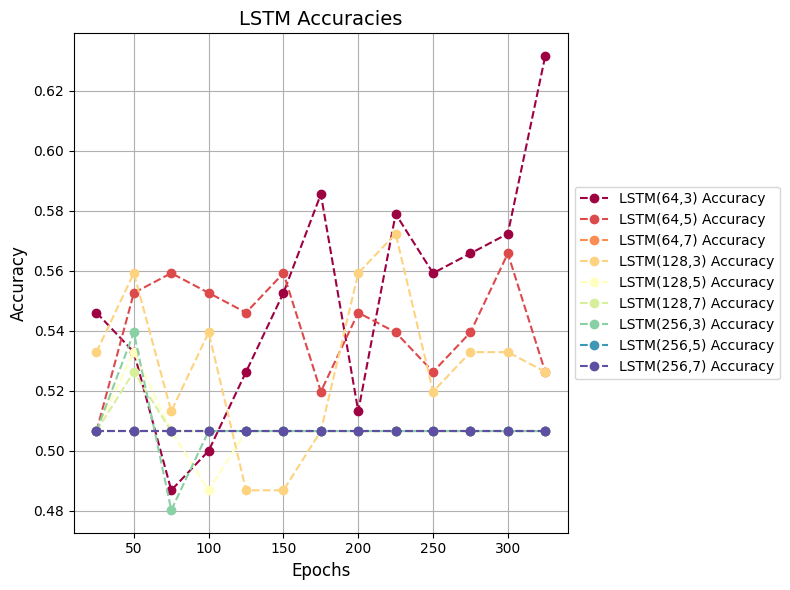

In [124]:
# ## import torch
# import torch.nn as nn

# class LSTMClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(LSTMClassifier, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()  # For binary classification

#     def forward(self, x):
#         # x: [batch_size, sequence_length, input_size]
#         _, (h_n, _) = self.lstm(x)  # h_n: [num_layers, batch_size, hidden_size]
#         h_n = h_n[-1]  # Take the last layer's hidden state
#         output = self.fc(h_n)  # Fully connected layer
#         output = self.sigmoid(output)  # Apply sigmoid activation
#         return output

# # Parameters
# input_size = 4
# # Number of input features per time step
# hidden_size_l = [64,128,256]     # Number of features in the hidden state
# num_layers_l = [3,5,7]      # Number of LSTM layers
# output_size = 1      # Binary classification (output is 1 probability)

# # Instantiate the LSTM model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# criterion = nn.BCELoss()
# accuracies_summarize=[]
# for hidden_size in hidden_size_l:
#     for num_layers in num_layers_l:
#         lstm_model = LSTMClassifier(input_size, hidden_size, num_layers, output_size)
#         print("hidden_size:",hidden_size,"num_layers:",num_layers)
#         optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
#         # Move model to the appropriate device
#         lstm_model = lstm_model.to(device)
#         # Fake data
#         # Instantiate model, loss, and optimizer
#         epochs =301
#         accuracies_lstm=[]
#         for epoch in range(epochs):
#             epoch_loss =0
#             for X_batch, y_batch in train_loader:
#                 # Training step
#                 X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#                 lstm_model.train()
#                 optimizer.zero_grad()
#                 output = lstm_model(X_batch)  # Forward pass
#                 loss = criterion(output, y_batch)  # Compute loss
#                 loss.backward()  # Backward pass
#                 optimizer.step()  # Update weights
#                 epoch_loss+=loss.item()
#             if epoch %25==0:
#                 all_y_pred_classes = []
#                 all_y_test_classes = []
#                 lstm_model.eval()
#                 with torch.no_grad():
#                     for X_batch, y_batch in val_loader:
#                         # Move inputs and labels to the appropriate device
#                         X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#                         # Get predictions
#                         y_pred = lstm_model(X_batch)
#                         y_pred_classes = (y_pred >= 0.5).float()
#                         # Collect predictions and true labels for overall metrics
#                         all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#                         all_y_test_classes.extend(y_batch.cpu().numpy())
#                 accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
#                 accuracies_lstm.append(accuracy)
                
#             if epoch %100==0:
#                 print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")
#         accuracies_summarize.append(accuracies_lstm)

# cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))
# plt.figure(figsize=(8, 6))
# idx =0
# for hidden_size in hidden_size_l:
#     for num_layers in num_layers_l:
#         accuracies_lstm = accuracies_summarize[idx]
#         epochs = [25 * i for i in range(1, len(accuracies_lstm) + 1)]
#         plt.plot(epochs, accuracies_lstm, label=f'LSTM({hidden_size},{num_layers}) Accuracy',color=cmap(idx), marker='o', linestyle='--')
#         idx +=1
# # Adding labels and title
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.title('LSTM Accuracies', fontsize=14) 
# plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
# plt.grid(True)

# # Show the plot
# plt.tight_layout() 
# plt.show()

## RNN

### Model RNN

In [130]:
# import torch
# import torch.nn as nn

# class RNNClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(RNNClassifier, self).__init__()
#         self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()  # For binary classification

#     def forward(self, x):
#         # x: [batch_size, sequence_length, input_size]
#         _, h_n = self.rnn(x)  # h_n: [num_layers, batch_size, hidden_size]
#         h_n = h_n[-1]  # Take the output of the last RNN layer
#         output = self.fc(h_n)  # Pass through fully connected layer
#         output = self.sigmoid(output)  # Sigmoid activation for binary output
#         return output

# # Parameters
# input_size = 4  # Number of features per time step
# hidden_size = 32  # Number of features in the hidden state
# num_layers = 7  # Number of RNN layers
# output_size = 1  # Binary classification

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Instantiate model
# rnn_model = RNNClassifier(input_size, hidden_size, num_layers, output_size).to(device)

### Training RNN

In [131]:
# # Fake data
# # Instantiate model, loss, and optimizer

# criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
# epochs = 301
# accuracies_rnn=[]
# for epoch in range(epochs):
#     epoch_loss = 0.0
#     for X_batch, y_batch in train_loader:
#         # Training step
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         rnn_model.train()
#         optimizer.zero_grad()
#         output = rnn_model(X_batch)  # Forward pass
#         loss = criterion(output, y_batch)  # Compute loss     
#         loss.backward()  # Backward pass
#         optimizer.step()  # Update weights
#         epoch_loss += loss.item()
#     all_y_pred_classes = []
#     all_y_test_classes = []
#     rnn_model.eval()
#     if epoch %25==0:
#         with torch.no_grad():
#             for X_batch, y_batch in val_loader:
#                 # Move inputs and labels to the appropriate device
#                 X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#                 # Get predictions
#                 y_pred = rnn_model(X_batch)
#                 y_pred_classes = (y_pred >= 0.5).float()
#                 # Collect predictions and true labels for overall metrics
#                 all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#                 all_y_test_classes.extend(y_batch.cpu().numpy())
#         accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
#         accuracies_rnn.append(accuracy)
#         print(f"Epoch:{epoch+1}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")

Epoch:1, Loss: 0.6930, Accuracy:0.5066 
Epoch:26, Loss: 0.6732, Accuracy:0.5724 
Epoch:51, Loss: 0.6597, Accuracy:0.5461 
Epoch:76, Loss: 0.4350, Accuracy:0.9013 
Epoch:101, Loss: 0.4099, Accuracy:0.8882 
Epoch:126, Loss: 0.6809, Accuracy:0.6842 
Epoch:151, Loss: 0.6845, Accuracy:0.5395 
Epoch:176, Loss: 0.6805, Accuracy:0.5789 
Epoch:201, Loss: 0.3597, Accuracy:0.8224 
Epoch:226, Loss: 0.6906, Accuracy:0.5066 
Epoch:251, Loss: 0.4018, Accuracy:0.8553 
Epoch:276, Loss: 0.3067, Accuracy:0.8947 
Epoch:301, Loss: 0.3011, Accuracy:0.8684 


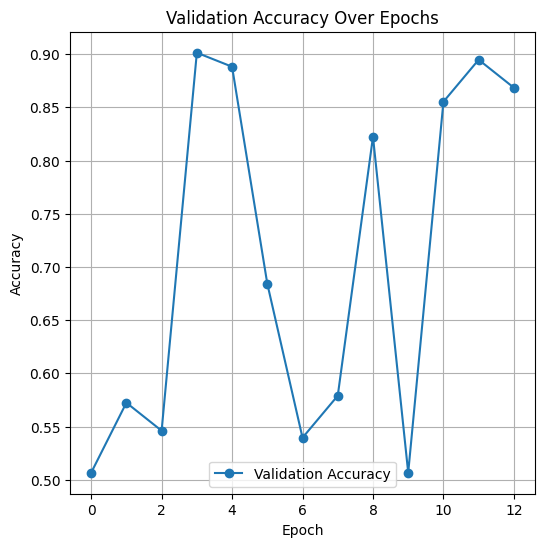

In [132]:
# plt.figure(figsize=(6, 6))
# plt.plot(range(0, epochs//25+1), accuracies_rnn, marker='o', label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Validation Accuracy Over Epochs')
# plt.legend()
# plt.grid(True)
# plt.show()

### Eval RNN

In [133]:
# from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# # Ensure the model is in evaluation mode

# # Initialize lists to collect predictions and labels for overall metrics
# all_y_pred_classes = []
# all_y_test_classes = []
# rnn_model.eval()
# with torch.no_grad():
#     idx = 0
#     for X_batch, y_batch in test_loader:
#         # Move inputs and labels to the appropriate device
#         # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#         # Get predictions
#         y_pred = rnn_model(X_batch)
#         y_pred_classes = (y_pred >= 0.5).float()
#         # print(y_pred_classes)
#         idx +=1
#         # if(idx <= 9):
#         #     print(y_pred)
#         # Calculate accuracy for this batch
#         accuracy = torch.sum(y_pred_classes == y_batch).item() / len(y_batch)
#         # print(f'Batch Accuracy: {accuracy * 100:.2f}%')
        
#         # Collect predictions and true labels for overall metrics
#         all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#         all_y_test_classes.extend(y_batch.cpu().numpy())
# accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
# # Calculate overall precision, recall, and F1-score
# precision = precision_score(all_y_test_classes, all_y_pred_classes)
# recall = recall_score(all_y_test_classes, all_y_pred_classes)
# f1 = f1_score(all_y_test_classes, all_y_pred_classes)
# print(torch.tensor(all_y_test_classes)[0:30].reshape(-1))
# print(torch.tensor(all_y_pred_classes)[0:30].reshape(-1))

# print(f'Overall Accuracy: {accuracy:.2f}')
# print(f'Overall Precision: {precision:.2f}')
# print(f'Overall Recall: {recall:.2f}')
# print(f'Overall F1 Score: {f1:.2f}')

tensor([1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.])
tensor([0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.])
Overall Accuracy: 0.84
Overall Precision: 1.00
Overall Recall: 0.70
Overall F1 Score: 0.82


## GRU

### Model GRU

In [98]:
# class GRUClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(GRUClassifier, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()  # For binary classification

#     def forward(self, x):
#         # x: [batch_size, sequence_length, input_size]
#         _, h_n = self.gru(x)  # h_n: [num_layers, batch_size, hidden_size]
#         h_n = h_n[-1]  # Take the output of the last GRU layer
#         output = self.fc(h_n)  # Pass through fully connected layer
#         output = self.sigmoid(output)  # Sigmoid activation for binary output
#         return output

# # Parameters
# input_size = 4  # Number of features per time step
# hidden_size = 16  # Number of features in the hidden state
# num_layers = 7  # Number of GRU layers
# output_size = 1# Binary classification
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Instantiate model
# gru_model = GRUClassifier(input_size, hidden_size, num_layers, output_size).to(device)


### Training GRU

In [99]:
# # Fake data
# # Instantiate model, loss, and optimizer

# criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
# epochs = 301
# accuracies_gru=[]
# for epoch in range(epochs):
#     epoch_loss =0
#     for X_batch, y_batch in train_loader:
#         # Training step

#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         gru_model.train()
#         optimizer.zero_grad()
#         output = gru_model(X_batch)  # Forward pass
#         loss = criterion(output, y_batch)  # Compute loss
#         loss.backward()  # Backward pass
#         optimizer.step()  # Update weights
#         epoch_loss += loss.item()
#     if epoch %25==0:
#         all_y_pred_classes = []
#         all_y_test_classes = []
#         gru_model.eval()
#         with torch.no_grad():
#             for X_batch, y_batch in val_loader:
#                 # Move inputs and labels to the appropriate device
#                 X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#                 # Get predictions
#                 y_pred = gru_model(X_batch)
#                 y_pred_classes = (y_pred >= 0.5).float()
#                 # Collect predictions and true labels for overall metrics
#                 all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#                 all_y_test_classes.extend(y_batch.cpu().numpy())
#         accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
#         accuracies_gru.append(accuracy)
#         print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")

Epoch:0, Loss: 0.6922, Accuracy:0.5066 
Epoch:25, Loss: 0.6677, Accuracy:0.5066 
Epoch:50, Loss: 0.6577, Accuracy:0.5461 
Epoch:75, Loss: 0.6351, Accuracy:0.5658 
Epoch:100, Loss: 0.5647, Accuracy:0.6842 
Epoch:125, Loss: 0.4795, Accuracy:0.7632 
Epoch:150, Loss: 0.2681, Accuracy:0.8947 
Epoch:175, Loss: 0.2224, Accuracy:0.9408 
Epoch:200, Loss: 0.1993, Accuracy:0.9408 
Epoch:225, Loss: 0.1954, Accuracy:0.9408 
Epoch:250, Loss: 0.1687, Accuracy:0.9474 
Epoch:275, Loss: 0.1564, Accuracy:0.9474 
Epoch:300, Loss: 0.1574, Accuracy:0.9211 


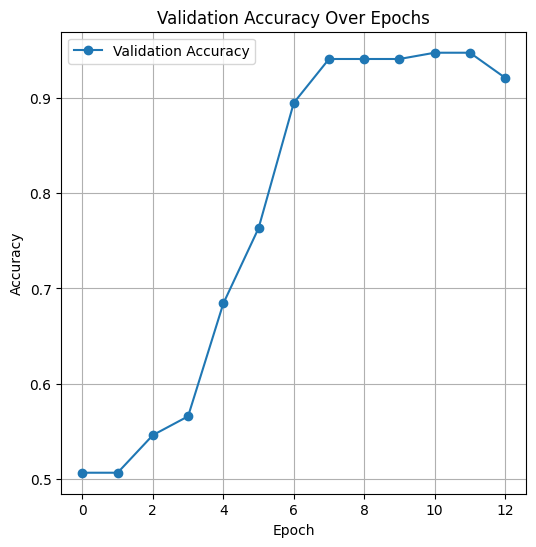

In [100]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(6, 6))
# plt.plot(range(0, epochs//25+1), accuracies_gru, marker='o', label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Validation Accuracy Over Epochs')
# plt.legend()
# plt.grid(True)
# plt.show()

### Eval GRU

In [101]:

# # Ensure the model is in evaluation mode

# # Initialize lists to collect predictions and labels for overall metrics
# all_y_pred_classes = []
# all_y_test_classes = []
# gru_model.eval()
# with torch.no_grad():
#     idx = 0
#     for X_batch, y_batch in test_loader:
#         # Move inputs and labels to the appropriate device
#         # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#         # Get predictions
#         y_pred = gru_model(X_batch)
#         y_pred_classes = (y_pred >= 0.5).float()
#         # Collect predictions and true labels for overall metrics
#         all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#         all_y_test_classes.extend(y_batch.cpu().numpy())
# accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
# # Calculate overall precision, recall, and F1-score
# precision = precision_score(all_y_test_classes, all_y_pred_classes)
# recall = recall_score(all_y_test_classes, all_y_pred_classes)
# f1 = f1_score(all_y_test_classes, all_y_pred_classes)
# print(torch.tensor(all_y_test_classes)[0:70].reshape(-1))
# print(torch.tensor(all_y_pred_classes)[0:70].reshape(-1))

# print(f'Overall Accuracy: {accuracy:.2f}')
# print(f'Overall Precision: {precision:.2f}')
# print(f'Overall Recall: {recall:.2f}')
# print(f'Overall F1 Score: {f1:.2f}')

tensor([1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.])
Overall Accuracy: 0.91
Overall Precision: 0.97
Overall Recall: 0.86
Overall F1 Score: 0.91


## LSTM

In [103]:
# import torch
# import torch.nn as nn

# class LSTMClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(LSTMClassifier, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()  # For binary classification

#     def forward(self, x):
#         # x: [batch_size, sequence_length, input_size]
#         _, (h_n, _) = self.lstm(x)  # h_n: [num_layers, batch_size, hidden_size]
#         h_n = h_n[-1]  # Take the last layer's hidden state
#         output = self.fc(h_n)  # Fully connected layer
#         output = self.sigmoid(output)  # Apply sigmoid activation
#         return output

# # Parameters
# input_size = 4       # Number of input features per time step
# hidden_size = 128     # Number of features in the hidden state
# num_layers = 3      # Number of LSTM layers
# output_size = 1      # Binary classification (output is 1 probability)

# # Instantiate the LSTM model
# lstm_model = LSTMClassifier(input_size, hidden_size, num_layers, output_size)

# # Move model to the appropriate device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# lstm_model = lstm_model.to(device)


In [104]:
# # Fake data
# # Instantiate model, loss, and optimizer

# criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
# epochs = 301
# accuracies_lstm=[]
# for epoch in range(epochs):
#     epoch_loss =0
#     for X_batch, y_batch in train_loader:
#         # Training step
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         lstm_model.train()
#         optimizer.zero_grad()
#         output = lstm_model(X_batch)  # Forward pass
#         loss = criterion(output, y_batch)  # Compute loss
#         loss.backward()  # Backward pass
#         optimizer.step()  # Update weights
#         epoch_loss+=loss.item()
#     if epoch %25==0:
#         all_y_pred_classes = []
#         all_y_test_classes = []
#         lstm_model.eval()
#         with torch.no_grad():
#             for X_batch, y_batch in val_loader:
#                 # Move inputs and labels to the appropriate device
#                 X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#                 # Get predictions
#                 y_pred = lstm_model(X_batch)
#                 y_pred_classes = (y_pred >= 0.5).float()
#                 # Collect predictions and true labels for overall metrics
#                 all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#                 all_y_test_classes.extend(y_batch.cpu().numpy())
#         accuracy = f1_score(all_y_test_classes,all_y_pred_classes)
#         accuracies_lstm.append(accuracy)
#         print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")

Epoch:0, Loss: 0.6913, Accuracy:0.6327 
Epoch:25, Loss: 0.6800, Accuracy:0.6022 
Epoch:50, Loss: 0.6752, Accuracy:0.5500 
Epoch:75, Loss: 0.6593, Accuracy:0.5333 
Epoch:100, Loss: 0.6465, Accuracy:0.5350 
Epoch:125, Loss: 0.6448, Accuracy:0.6374 
Epoch:150, Loss: 0.6422, Accuracy:0.6199 
Epoch:175, Loss: 0.5934, Accuracy:0.6275 
Epoch:200, Loss: 0.2048, Accuracy:0.9452 
Epoch:225, Loss: 0.1129, Accuracy:0.9351 
Epoch:250, Loss: 0.0913, Accuracy:0.9605 
Epoch:275, Loss: 0.0770, Accuracy:0.9548 
Epoch:300, Loss: 0.0635, Accuracy:0.9542 


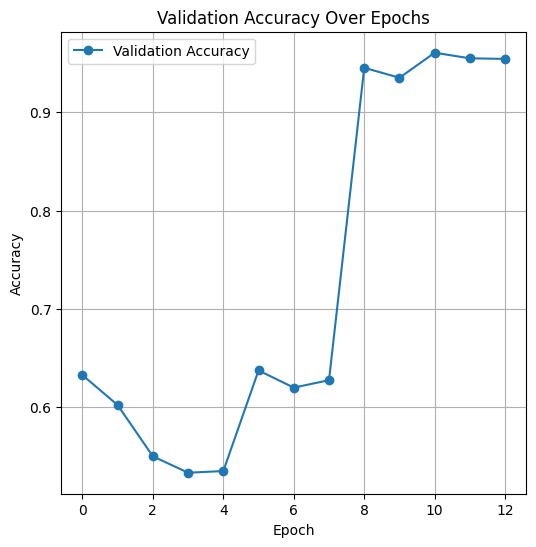

In [105]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(6, 6))
# plt.plot(range(0, epochs//25+1), accuracies_lstm, marker='o', label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Validation Accuracy Over Epochs')
# plt.legend()
# plt.grid(True)
# plt.show()

In [106]:

# # Ensure the model is in evaluation mode

# # Initialize lists to collect predictions and labels for overall metrics
# all_y_pred_classes = []
# all_y_test_classes = []
# lstm_model.eval()
# with torch.no_grad():
#     idx = 0
#     for X_batch, y_batch in test_loader:
#         # Move inputs and labels to the appropriate device
#         # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         X_batch, y_batch = X_batch.to(device),y_batch.to(device)
#         # Get predictions
#         y_pred = lstm_model(X_batch)
#         y_pred_classes = (y_pred >= 0.5).float()
#         # Collect predictions and true labels for overall metrics
#         all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
#         all_y_test_classes.extend(y_batch.cpu().numpy())
# accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
# # Calculate overall precision, recall, and F1-score
# precision = precision_score(all_y_test_classes, all_y_pred_classes)
# recall = recall_score(all_y_test_classes, all_y_pred_classes)
# f1 = f1_score(all_y_test_classes, all_y_pred_classes)
# print(torch.tensor(all_y_test_classes)[0:30].reshape(-1))
# print(torch.tensor(all_y_pred_classes)[0:30].reshape(-1))

# print(f'Overall Accuracy: {accuracy:.2f}')
# print(f'Overall Precision: {precision:.2f}')
# print(f'Overall Recall: {recall:.2f}')
# print(f'Overall F1 Score: {f1:.2f}')

tensor([1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.])
tensor([1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.])
Overall Accuracy: 0.95
Overall Precision: 0.96
Overall Recall: 0.94
Overall F1 Score: 0.95


In [107]:
# ## import torch
# import torch.nn as nn

# class LSTMClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(LSTMClassifier, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()  # For binary classification

#     def forward(self, x):
#         # x: [batch_size, sequence_length, input_size]
#         _, (h_n, _) = self.lstm(x)  # h_n: [num_layers, batch_size, hidden_size]
#         h_n = h_n[-1]  # Take the last layer's hidden state
#         output = self.fc(h_n)  # Fully connected layer
#         output = self.sigmoid(output)  # Apply sigmoid activation
#         return output

# # Parameters
# input_size = 4      # Number of input features per time step
# hidden_size_l = [64,128,256]     # Number of features in the hidden state
# num_layers_l = [3,5,7]      # Number of LSTM layers
# output_size = 1      # Binary classification (output is 1 probability)

# # Instantiate the LSTM model


## Comparison

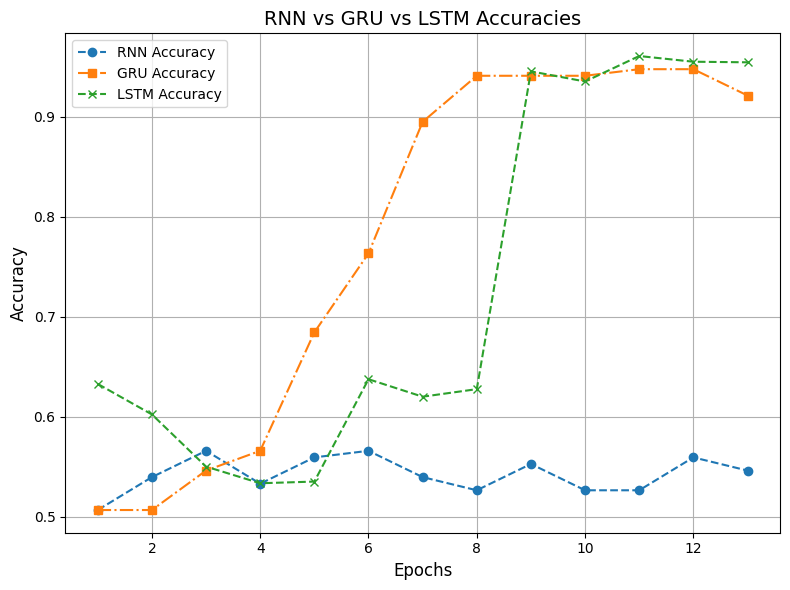

In [108]:
# epochs_rnn = list(range(1, len(accuracies_rnn) + 1))
# epochs_gru=list(range(1, len(accuracies_gru) + 1))
# epochs_lstm=list(range(1, len(accuracies_lstm) + 1))

# plt.figure(figsize=(8, 6))
# plt.plot(epochs_rnn, accuracies_rnn, label='RNN Accuracy', marker='o', linestyle='--')
# plt.plot(epochs_gru, accuracies_gru, label='GRU Accuracy', marker='s', linestyle='-.')
# plt.plot(epochs_lstm, accuracies_lstm, label='LSTM Accuracy', marker='x', linestyle='--')

# # Adding labels and title
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.title('RNN vs GRU vs LSTM Accuracies', fontsize=14)
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.tight_layout()
# plt.show()

# Multi class

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import random
import pandas as pd
import os

# Đường dẫn đến thư mục chứa các file CSV
folder_path = '/kaggle/input/data-normal-rate/hour'

# Danh sách chứa tất cả các DataFrame
all_dataframes = []

# Lặp qua tất cả các file CSV trong thư mục
# for file_name in os.listdir(folder_path):
#     if file_name.endswith('.csv'):
#         file_path = os.path.join(folder_path, file_name)
#         df = pd.read_csv(file_path)
#         all_dataframes.append(df)

# daily
for folder in os.listdir(folder_path):
    if folder == "merge":
        continue
    for file_name in os.listdir(os.path.join(folder_path,folder)):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, folder,file_name)
            df = pd.read_csv(file_path)
            all_dataframes.append(df)
# print(all_dataframes)

# Gộp tất cả các DataFrame lại
merged_df = pd.concat(all_dataframes, ignore_index=True)
# Lưu DataFrame gộp vào một file CSV mới
merged_df.to_csv('merged_file.csv', index=False)

# Đọc dữ liệu từ tệp CSV
file_path = "/kaggle/working/merged_file.csv"
df = pd.read_csv(file_path)

# Lựa chọn các đặc trưng: thời gian, nhiệt độ, kinh độ, vĩ độ
# Chuyển đổi cột thời gian thành số (giả sử là số giờ từ đầu ngày)
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour

# Chuyển đổi cột thời gian thành định dạng datetime
df['time'] = pd.to_datetime(df['time'])

# Chọn một ngày mốc
epoch = pd.Timestamp('2022-01-01')

# Tính toán số ngày từ ngày mốc và cộng thêm số giờ
df['time_numeric'] = (df['time'] - epoch).dt.days + df['time'].dt.hour/24
df['t2m'] +=273
df['longitude'] += 100
df["latitude"] += 100
# Chọn các cột đặc trưng và nhãn
features = df[['t2m']].values
# features = df['t2m'].values.reshape(-1, 1)
# labels = df['Fault_Label'].values.astype("float32")  # Hoặc 'Fault_Type'
labels = df['Fault_Type'].values  # Hoặc 'Fault_Label'
# print(features[:30])
# print(df['t2m'])
# # Chuẩn hóa dữ liệu
scaler = StandardScaler()
# scaler=MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)
# # print(features[:30])
sequence_length = 48

# features = features.reshape(-1)
num_samples = len(features) - sequence_length + 1

#Non - overlap
X_seq = np.array([features[i*sequence_length:(i+1)*sequence_length] for i in range(num_samples//sequence_length)])
y_seq = np.array([max(labels[i*sequence_length:(i+1)*sequence_length]) for i in range(num_samples//sequence_length)])

#Overlap
# X_seq = np.array([features[i:i+sequence_length] for i in range(num_samples)])
# y_seq = np.array([max(labels[i:i+sequence_length]) for i in range(num_samples)])
# y_seq = np.expand_dims(y_seq,axis=1)
print(y_seq.shape)
# # Splitting the data
split_ratio = 0.1
split_index = int(num_samples//sequence_length * split_ratio)
# X_train, X_test = X_seq[split_index:], X_seq[:split_index]
# y_train, y_test = y_seq[split_index:], y_seq[:split_index]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


# Converting to Tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val)


# Creating TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Verify batch shape
for X_batch, y_batch in train_loader:
    print("Feature batch:", X_batch.shape)  # Should output [64, 5, 4]
    print("Label batch:", y_batch.shape)    # Should output [64]
    # print(X_batch)
    break

(4561,)
Feature batch: torch.Size([128, 48, 1])
Label batch: torch.Size([128])


In [9]:
idx = 0
for X_batch, y_batch in train_loader:
    if idx == 1:
        print("Feature batch:", X_batch.shape)
        print("Label batch:", y_batch)
        print(y_batch.shape)
        break
    idx +=1

Feature batch: torch.Size([64, 48, 1])
Label batch: tensor([4, 4, 0, 2, 3, 2, 0, 2, 3, 0, 0, 0, 1, 4, 2, 4, 3, 2, 3, 2, 3, 4, 3, 4,
        0, 2, 0, 0, 3, 0, 1, 2, 1, 1, 4, 2, 0, 1, 1, 3, 3, 3, 2, 3, 3, 0, 0, 1,
        0, 2, 4, 0, 3, 3, 2, 4, 4, 3, 2, 0, 0, 3, 1, 0])
torch.Size([64])


In [2]:
len(y_train_tensor), len(y_train_tensor[y_train_tensor==0]),len(y_train_tensor[y_train_tensor==1]),len(y_train_tensor[y_train_tensor==2]),len(y_train_tensor[y_train_tensor==3])

(4104, 927, 823, 821, 831)

## Tuning multiclass RNN

hidden_size: 32 num_layers: 3
Epoch:0, Loss: 1.6127, Accuracy:0.1711 
Epoch:100, Loss: 1.5750, Accuracy:0.2588 
Epoch:200, Loss: 1.0020, Accuracy:0.5219 
Epoch:300, Loss: 0.7278, Accuracy:0.6228 
Epoch:400, Loss: 0.6801, Accuracy:0.6930 
Epoch:500, Loss: 0.6636, Accuracy:0.6667 
hidden_size: 32 num_layers: 5
Epoch:0, Loss: 1.6185, Accuracy:0.2018 
Epoch:100, Loss: 0.6303, Accuracy:0.7061 
Epoch:200, Loss: 0.6271, Accuracy:0.6842 
Epoch:300, Loss: 0.5909, Accuracy:0.6930 
Epoch:400, Loss: 0.5596, Accuracy:0.7237 
Epoch:500, Loss: 0.5439, Accuracy:0.7237 
hidden_size: 32 num_layers: 7
Epoch:0, Loss: 1.6159, Accuracy:0.1754 
Epoch:100, Loss: 0.7206, Accuracy:0.6535 
Epoch:200, Loss: 0.6164, Accuracy:0.6711 
Epoch:300, Loss: 0.8970, Accuracy:0.5658 
Epoch:400, Loss: 0.6476, Accuracy:0.7325 
Epoch:500, Loss: 0.5619, Accuracy:0.7368 
hidden_size: 64 num_layers: 3
Epoch:0, Loss: 1.6076, Accuracy:0.1842 
Epoch:100, Loss: 0.5692, Accuracy:0.7193 
Epoch:200, Loss: 0.4549, Accuracy:0.8026 
Epoch:

/tmp/ipykernel_30/3505061078.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))


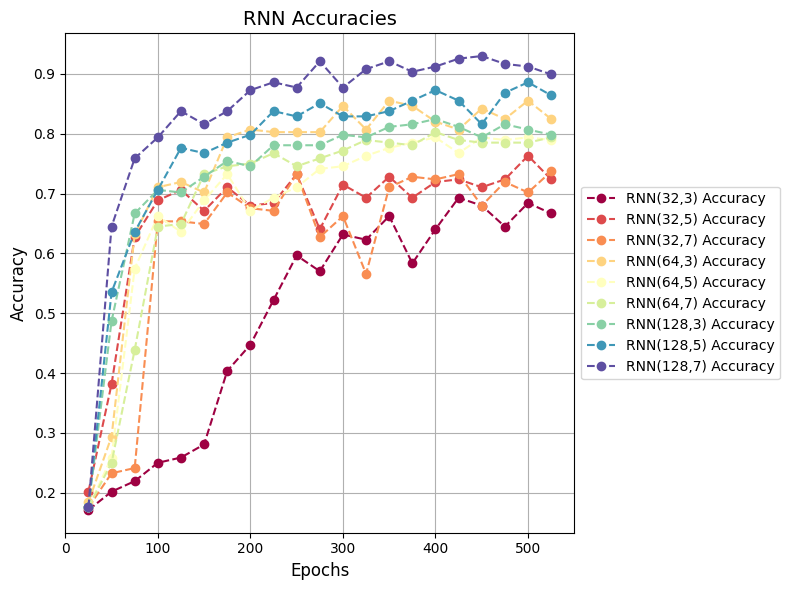

In [12]:
import torch
import torch.nn as nn

class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNClassifier, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        # self.softmax = nn.Softmax(dim=1)  # For binary classification

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        _, h_n = self.rnn(x)  # h_n: [num_layers, batch_size, hidden_size]
        h_n = h_n[-1]  # Take the output of the last RNN layer
        output = self.fc(h_n)  # Pass through fully connected layer
        # output = self.softmax(output)  # Sigmoid activation for binary output
        return output
# Parameters
input_size = 1  # Number of features per time step
hidden_size_l = [32,64,128]  # Number of features in the hidden state
num_layers_l = [3 ,5 ,7]  # Number of RNN layers
output_size = 5  # Binary classification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
accuracies_summarize=[]
for hidden_size in hidden_size_l:
    for num_layers in num_layers_l:
        rnn_model = RNNClassifier(input_size, hidden_size, num_layers, output_size)
        print("hidden_size:",hidden_size,"num_layers:",num_layers)
        optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.0001)
        # Move model to the appropriate device
        rnn_model = rnn_model.to(device)
        # Fake data
        # Instantiate model, loss, and optimizer
        epochs =501
        accuracies_rnn=[]
        for epoch in range(epochs):
            epoch_loss =0
            for X_batch, y_batch in train_loader:
                # Training step
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                rnn_model.train()
                optimizer.zero_grad()
                output = rnn_model(X_batch)  # Forward pass
                loss = criterion(output, y_batch)  # Compute loss
                loss.backward()  # Backward pass
                optimizer.step()  # Update weights
                epoch_loss+=loss.item()
            if epoch %25==0:
                all_y_pred_classes = []
                all_y_test_classes = []
                rnn_model.eval()
                with torch.no_grad():
                    for X_batch, y_batch in val_loader:
                        # Move inputs and labels to the appropriate device
                        X_batch, y_batch = X_batch.to(device),y_batch.to(device)
                        # Get predictions
                        y_pred = rnn_model(X_batch)
                        y_pred = F.softmax(y_pred,dim=1)
                        y_pred_classes = torch.argmax(y_pred,dim=1)
                        # Collect predictions and true labels for overall metrics
                        all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
                        all_y_test_classes.extend(y_batch.cpu().numpy())
                accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
                accuracies_rnn.append(accuracy)
                
            if epoch %100==0:
                print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")
        accuracies_summarize.append(accuracies_rnn)

cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))
plt.figure(figsize=(8, 6))
idx =0
for hidden_size in hidden_size_l:
    for num_layers in num_layers_l:
        accuracies_rnn = accuracies_summarize[idx]
        epochs = [25 * i for i in range(1, len(accuracies_rnn) + 1)]
        plt.plot(epochs, accuracies_rnn, label=f'RNN({hidden_size},{num_layers}) Accuracy',color=cmap(idx), marker='o', linestyle='--')
        idx +=1
# Adding labels and title
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('RNN Accuracies', fontsize=14) 
plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
plt.grid(True)

# Show the plot
plt.tight_layout() 
plt.show()

### Tuning GRU multiclass

hidden_size: 32 num_layers: 3
Epoch:99, Loss: 0.4357, Accuracy:0.7500 
Epoch:199, Loss: 0.2348, Accuracy:0.8246 
Epoch:299, Loss: 0.1349, Accuracy:0.8860 
Epoch:399, Loss: 0.0866, Accuracy:0.8947 
hidden_size: 32 num_layers: 5
Epoch:99, Loss: 0.2483, Accuracy:0.8728 
Epoch:199, Loss: 0.1352, Accuracy:0.8991 
Epoch:299, Loss: 0.0796, Accuracy:0.9123 
Epoch:399, Loss: 0.0368, Accuracy:0.9123 
hidden_size: 32 num_layers: 7
Epoch:99, Loss: 0.1972, Accuracy:0.8947 
Epoch:199, Loss: 0.1242, Accuracy:0.9342 
Epoch:299, Loss: 0.0878, Accuracy:0.9254 
Epoch:399, Loss: 0.0690, Accuracy:0.9211 
hidden_size: 64 num_layers: 3
Epoch:99, Loss: 0.2740, Accuracy:0.8421 
Epoch:199, Loss: 0.1198, Accuracy:0.8684 
Epoch:299, Loss: 0.1285, Accuracy:0.8772 
Epoch:399, Loss: 0.0381, Accuracy:0.8816 
hidden_size: 64 num_layers: 5
Epoch:99, Loss: 0.1120, Accuracy:0.9167 
Epoch:199, Loss: 0.0676, Accuracy:0.9430 
Epoch:299, Loss: 0.0381, Accuracy:0.9518 
Epoch:399, Loss: 0.0001, Accuracy:0.9649 
hidden_size: 64

/tmp/ipykernel_30/1196557413.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))


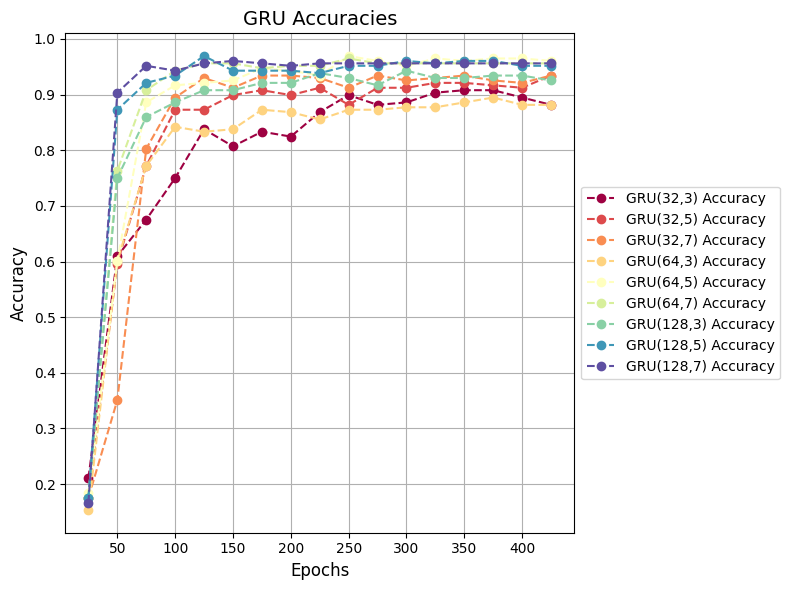

In [2]:
class GRUClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        # self.sigmoid = nn.Sigmoid()  # For binary classification

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        _, h_n = self.gru(x)  # h_n: [num_layers, batch_size, hidden_size]
        h_n = h_n[-1]  # Take the output of the last GRU layer
        output = self.fc(h_n)  # Pass through fully connected layer
        # output = self.sigmoid(output)  # Sigmoid activation for binary output
        return output

# Parameters
input_size = 1  # Number of features per time step
hidden_size_l = [32,64,128]  # Number of features in the hidden state
num_layers_l = [3,5,7]  # Number of GRU layers
output_size = 5 # Binary classification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
accuracies_summarize=[]
for hidden_size in hidden_size_l:
    for num_layers in num_layers_l:
        gru_model = GRUClassifier(input_size, hidden_size, num_layers, output_size)
        print("hidden_size:",hidden_size,"num_layers:",num_layers)
        optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
        # Move model to the appropriate device
        gru_model = gru_model.to(device)
        # Fake data
        # Instantiate model, loss, and optimizer
        epochs =401
        accuracies_gru=[]
        for epoch in range(epochs):
            epoch_loss =0
            for X_batch, y_batch in train_loader:
                # Training step
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                gru_model.train()
                optimizer.zero_grad()
                output = gru_model(X_batch)  # Forward pass
                loss = criterion(output, y_batch)  # Compute loss
                loss.backward()  # Backward pass
                optimizer.step()  # Update weights
                epoch_loss+=loss.item()
            if epoch %25==0:
                all_y_pred_classes = []
                all_y_test_classes = []
                gru_model.eval()
                with torch.no_grad():
                    for X_batch, y_batch in val_loader:
                        # Move inputs and labels to the appropriate device
                        X_batch, y_batch = X_batch.to(device),y_batch.to(device)
                        # Get predictions
                        y_pred = gru_model(X_batch)
                        y_pred = F.softmax(y_pred,dim=1)
                        y_pred_classes = torch.argmax(y_pred,dim=1)
                        # Collect predictions and true labels for overall metrics
                        all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
                        all_y_test_classes.extend(y_batch.cpu().numpy())
                accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
                accuracies_gru.append(accuracy)
                
            if (epoch+1) %100==0:
                print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")
        accuracies_summarize.append(accuracies_gru)

cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))
plt.figure(figsize=(8, 6))
idx =0
for hidden_size in hidden_size_l:
    for num_layers in num_layers_l:
        accuracies_gru = accuracies_summarize[idx]
        epochs = [25 * i for i in range(1, len(accuracies_gru) + 1)]
        plt.plot(epochs, accuracies_gru, label=f'GRU({hidden_size},{num_layers}) Accuracy',color=cmap(idx), marker='o', linestyle='--')
        idx +=1
# Adding labels and title
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('GRU Accuracies', fontsize=14) 
plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
plt.grid(True)

# Show the plot
plt.tight_layout() 
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

class GRUClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        # self.sigmoid = nn.Sigmoid()  # For binary classification

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        _, h_n = self.gru(x)  # h_n: [num_layers, batch_size, hidden_size]
        h_n = h_n[-1]  # Take the output of the last GRU layer
        output = self.fc(h_n)  # Pass through fully connected layer
        # output = self.sigmoid(output)  # Sigmoid activation for binary output
        return output


def fitness(model, train_loader, val_loader, criterion, optimizer, epochs=200, device ='cpu'):
    # Training loop
    model.train()
    epoch_loss=0
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            # Training step
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            model.train()
            optimizer.zero_grad()
            output = model(X_batch)  # Forward pass
            loss = criterion(output, y_batch)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            epoch_loss+=loss.item()
        # Validation phase
    all_y_pred_classes = []
    all_y_test_classes = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            # Move inputs and labels to the appropriate device
            X_batch, y_batch = X_batch.to(device),y_batch.to(device)
            y_pred = model(X_batch)
            y_pred = F.softmax(y_pred,dim=1)
            y_pred_classes = torch.argmax(y_pred,dim=1)
            # Collect predictions and true labels for overall metrics
            all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
            all_y_test_classes.extend(y_batch.cpu().numpy())
            class_f1_scores = f1_score(all_y_test_classes, all_y_pred_classes,average='weighted')
    return class_f1_scores  # Negative loss as fitness (lower validation loss = better fitness)


# Define the evolutionary algorithm
def evolve_hyperparameters(input_size, train_loader, val_loader, generations=10, population_size=10, device ='cpu'):
    # Define hyperparameter search space
    hidden_size_space = [8, 16,32,64, 128]
    num_layers_space = [1, 2, 3, 4, 5, 6, 7]
    output_size = 5

    # Initialize population
    population = [
        {
            "hidden_size": random.choice(hidden_size_space),
            "num_layers": random.choice(num_layers_space),
            # "output_size": random.choice(output_size_space),
        }
        for _ in range(population_size)
    ]

    # Generate synthetic data for testing
    # data = torch.randn(32, 10, input_size)  # [batch_size, sequence_length, input_size]
    # labels = torch.randint(0, 5, (32,))
    criterion = nn.CrossEntropyLoss()

    for generation in range(generations):
        fitness_scores = []

        # Evaluate each individual
        for individual in population:
            hidden_size = individual["hidden_size"]
            num_layers = individual["num_layers"]
            # output_size = individual["output_size"]
            model = GRUClassifier(input_size, hidden_size, num_layers, output_size).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

            fitness_score = fitness(model, train_loader, val_loader, criterion,optimizer,device=device)
            fitness_scores.append((fitness_score, individual))

        # Sort population by fitness
        fitness_scores.sort(reverse=True, key=lambda x: x[0])
        population = [x[1] for x in fitness_scores[: population_size // 2]]

        # Crossover and mutation to create new population
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population, 2)
            child = {
                "hidden_size": random.choice([parent1["hidden_size"], parent2["hidden_size"]]),
                "num_layers": random.choice([parent1["num_layers"], parent2["num_layers"]]),
                # "output_size": random.choice([parent1["output_size"], parent2["output_size"]]),
            }

            # Mutation
            if random.random() < 0.1:  # 10% mutation rate
                child["hidden_size"] = random.choice(hidden_size_space)
            if random.random() < 0.1:
                child["num_layers"] = random.choice(num_layers_space)
            # if random.random() < 0.1:
            #     child["output_size"] = random.choice(output_size_space)

            new_population.append(child)

        population = new_population

        # Log the best individual of the generation
        best_fitness, best_individual = fitness_scores[0]
        print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Individual = {best_individual}")

    # Return the best individual from the final generation
    return fitness_scores[0][1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Run the evolutionary algorithm
input_size = 4
best_hyperparameters = evolve_hyperparameters(input_size, train_loader, val_loader,device =device)
print(f"Best Hyperparameters: {best_hyperparameters}")


Generation 0: Best Fitness = 0.9693444287341935, Best Individual = {'hidden_size': 64, 'num_layers': 6}
Generation 1: Best Fitness = 0.9649255612328087, Best Individual = {'hidden_size': 128, 'num_layers': 5}
Generation 2: Best Fitness = 0.9693741803454066, Best Individual = {'hidden_size': 128, 'num_layers': 5}
Generation 3: Best Fitness = 0.9693237560040525, Best Individual = {'hidden_size': 128, 'num_layers': 5}
Generation 4: Best Fitness = 0.9693090622209212, Best Individual = {'hidden_size': 128, 'num_layers': 5}
Generation 5: Best Fitness = 0.973686667649516, Best Individual = {'hidden_size': 128, 'num_layers': 6}


KeyboardInterrupt: 

### Tuning LSTM multiclass

hidden_size: 32 num_layers: 3
Epoch:0, Loss: 1.6060, Accuracy:0.1754 
Epoch:100, Loss: 1.0405, Accuracy:0.4737 
Epoch:200, Loss: 0.4628, Accuracy:0.6930 
Epoch:300, Loss: 0.3248, Accuracy:0.7939 
Epoch:400, Loss: 0.2984, Accuracy:0.8070 
hidden_size: 32 num_layers: 5
Epoch:0, Loss: 1.6080, Accuracy:0.1754 
Epoch:100, Loss: 0.3452, Accuracy:0.8070 
Epoch:200, Loss: 0.1483, Accuracy:0.8947 
Epoch:300, Loss: 0.0826, Accuracy:0.9035 
Epoch:400, Loss: 0.0426, Accuracy:0.9386 
hidden_size: 32 num_layers: 7
Epoch:0, Loss: 1.6073, Accuracy:0.1754 
Epoch:100, Loss: 0.2304, Accuracy:0.8991 
Epoch:200, Loss: 0.1069, Accuracy:0.9386 
Epoch:300, Loss: 0.0565, Accuracy:0.9474 
Epoch:400, Loss: 0.0369, Accuracy:0.9430 
hidden_size: 64 num_layers: 3
Epoch:0, Loss: 1.6032, Accuracy:0.1798 
Epoch:100, Loss: 0.4720, Accuracy:0.7281 
Epoch:200, Loss: 0.1187, Accuracy:0.9079 
Epoch:300, Loss: 0.0735, Accuracy:0.8947 
Epoch:400, Loss: 0.0341, Accuracy:0.8947 
hidden_size: 64 num_layers: 5
Epoch:0, Loss: 1.6

/tmp/ipykernel_30/1545697956.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))


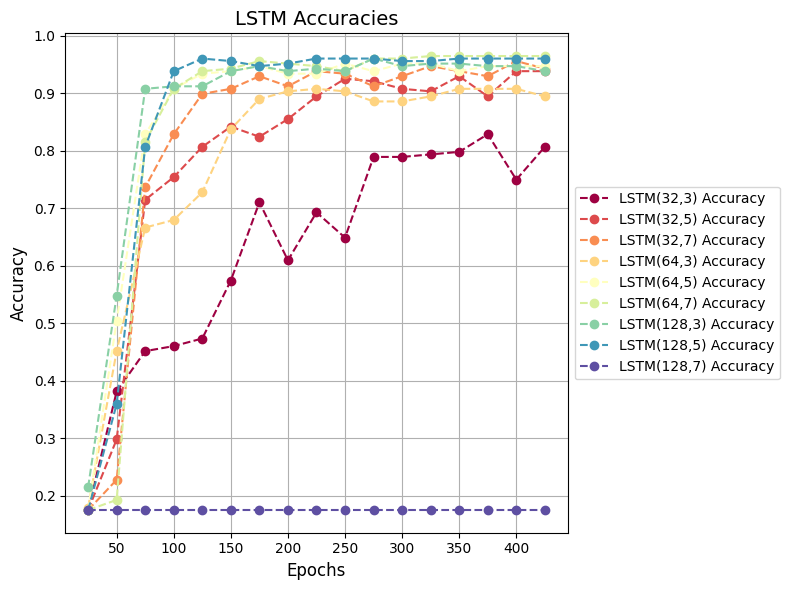

In [5]:
## import torch
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        # self.sigmoid = nn.Sigmoid()  # For binary classification

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        _, (h_n, _) = self.lstm(x)  # h_n: [num_layers, batch_size, hidden_size]
        h_n = h_n[-1]  # Take the last layer's hidden state
        output = self.fc(h_n)  # Fully connected layer
        # output = self.sigmoid(output)  # Apply sigmoid activation
        return output

# Parameters
input_size = 1
# Number of input features per time step
hidden_size_l = [32, 64,128]     # Number of features in the hidden state
num_layers_l = [3,5,7]      # Number of LSTM layers
output_size = 5      # Binary classification (output is 1 probability)

# Instantiate the LSTM model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
accuracies_summarize=[]
for hidden_size in hidden_size_l:
    for num_layers in num_layers_l:
        lstm_model = LSTMClassifier(input_size, hidden_size, num_layers, output_size)
        print("hidden_size:",hidden_size,"num_layers:",num_layers)
        optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
        # Move model to the appropriate device
        lstm_model = lstm_model.to(device)
        # Fake data
        # Instantiate model, loss, and optimizer
        epochs =401
        accuracies_lstm=[]
        for epoch in range(epochs):
            epoch_loss =0
            for X_batch, y_batch in train_loader:
                # Training step
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                lstm_model.train()
                optimizer.zero_grad()
                output = lstm_model(X_batch)  # Forward pass
                loss = criterion(output, y_batch)  # Compute loss
                loss.backward()  # Backward pass
                optimizer.step()  # Update weights
                epoch_loss+=loss.item()
            if epoch %25==0:
                all_y_pred_classes = []
                all_y_test_classes = []
                lstm_model.eval()
                with torch.no_grad():
                    for X_batch, y_batch in val_loader:
                        # Move inputs and labels to the appropriate device
                        X_batch, y_batch = X_batch.to(device),y_batch.to(device)
                        # Get predictions
                        y_pred = lstm_model(X_batch)
                        y_pred = F.softmax(y_pred,dim=1)
                        y_pred_classes = torch.argmax(y_pred,dim=1)
                        # Collect predictions and true labels for overall metrics
                        all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
                        all_y_test_classes.extend(y_batch.cpu().numpy())
                accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
                accuracies_lstm.append(accuracy)
                
            if epoch %100==0:
                print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")
        accuracies_summarize.append(accuracies_lstm)

cmap = cm.get_cmap('Spectral', len(hidden_size_l) * len(num_layers_l))
plt.figure(figsize=(8, 6))
idx =0
for hidden_size in hidden_size_l:
    for num_layers in num_layers_l:
        accuracies_lstm = accuracies_summarize[idx]
        epochs = [25 * i for i in range(1, len(accuracies_lstm) + 1)]
        plt.plot(epochs, accuracies_lstm, label=f'LSTM({hidden_size},{num_layers}) Accuracy',color=cmap(idx), marker='o', linestyle='--')
        idx +=1
# Adding labels and title
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('LSTM Accuracies', fontsize=14) 
plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
plt.grid(True)

# Show the plot
plt.tight_layout() 
plt.show()

## RNN

In [14]:
import torch
import torch.nn as nn

class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNClassifier, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        # self.softmax = nn.Softmax(dim=1)  # For binary classification

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        _, h_n = self.rnn(x)  # h_n: [num_layers, batch_size, hidden_size]
        h_n = h_n[-1]  # Take the output of the last RNN layer
        output = self.fc(h_n)  # Pass through fully connected layer
        # output = self.softmax(output)  # Sigmoid activation for binary output
        return output

# Parameters
input_size = 1  # Number of features per time step
hidden_size = 128  # Number of features in the hidden state
num_layers = 5  # Number of RNN layers
output_size = 5  # Binary classification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate model
rnn_model = RNNClassifier(input_size, hidden_size, num_layers, output_size).to(device)

In [15]:
# Fake data
# Instantiate model, loss, and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.0001)
epochs = 801
accuracies_rnn=[]
for epoch in range(epochs):
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        # Training step
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        rnn_model.train()
        optimizer.zero_grad()
        output = rnn_model(X_batch)  # Forward pass
        loss = criterion(output, y_batch)  # Compute loss     
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        epoch_loss += loss.item()
    all_y_pred_classes = []
    all_y_test_classes = []
    rnn_model.eval()
    if epoch %25 ==0:
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # Move inputs and labels to the appropriate device
                X_batch, y_batch = X_batch.to(device),y_batch.to(device)
                # Get predictions
                y_pred = rnn_model(X_batch)
                y_pred = F.softmax(y_pred,dim=1)
                y_pred_classes = torch.argmax(y_pred,dim=1)
                # Collect predictions and true labels for overall metrics
                all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
                all_y_test_classes.extend(y_batch.cpu().numpy())
        accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
        accuracies_rnn.append(accuracy)
        print(f"Epoch:{epoch+1}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")

Epoch:1, Loss: 1.6076, Accuracy:0.1754 
Epoch:26, Loss: 1.4912, Accuracy:0.3991 
Epoch:51, Loss: 0.6139, Accuracy:0.6447 
Epoch:76, Loss: 0.5412, Accuracy:0.7368 
Epoch:101, Loss: 0.4822, Accuracy:0.7807 
Epoch:126, Loss: 0.4517, Accuracy:0.8202 
Epoch:151, Loss: 0.4025, Accuracy:0.8114 
Epoch:176, Loss: 0.4139, Accuracy:0.8289 
Epoch:201, Loss: 0.3846, Accuracy:0.8202 
Epoch:226, Loss: 0.3906, Accuracy:0.8377 
Epoch:251, Loss: 0.3334, Accuracy:0.8465 
Epoch:276, Loss: 0.3192, Accuracy:0.8246 
Epoch:301, Loss: 0.3028, Accuracy:0.8333 
Epoch:326, Loss: 0.2862, Accuracy:0.8246 
Epoch:351, Loss: 0.2892, Accuracy:0.8246 
Epoch:376, Loss: 0.3187, Accuracy:0.8596 
Epoch:401, Loss: 0.2500, Accuracy:0.8377 
Epoch:426, Loss: 0.2134, Accuracy:0.8377 
Epoch:451, Loss: 0.1949, Accuracy:0.8509 
Epoch:476, Loss: 0.2068, Accuracy:0.8640 
Epoch:501, Loss: 0.1500, Accuracy:0.8289 
Epoch:526, Loss: 0.1544, Accuracy:0.8246 
Epoch:551, Loss: 0.2001, Accuracy:0.8421 
Epoch:576, Loss: 0.1445, Accuracy:0.833

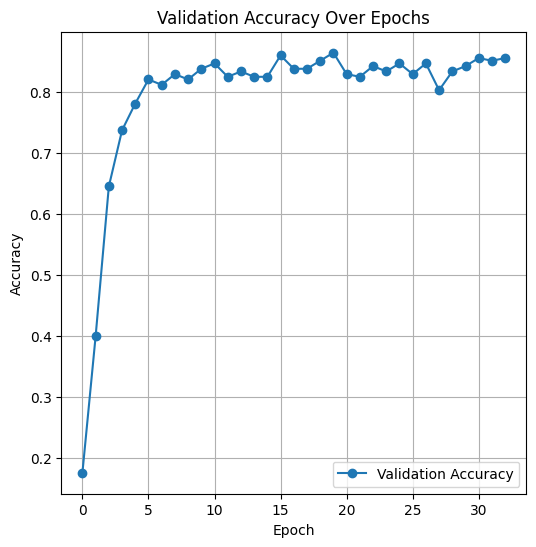

In [16]:
plt.figure(figsize=(6, 6))
plt.plot(range(0, epochs//25+1), accuracies_rnn, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Ensure the model is in evaluation mode

# Initialize lists to collect predictions and labels for overall metrics
all_y_pred_classes = []
all_y_test_classes = []
rnn_model.eval()
with torch.no_grad():
    idx = 0
    for X_batch, y_batch in test_loader:
        # Move inputs and labels to the appropriate device
        # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        X_batch, y_batch = X_batch.to(device),y_batch.to(device)
        # Get predictions
        y_pred = rnn_model(X_batch)
        y_pred = F.softmax(y_pred,dim=1)
        y_pred_classes = y_pred.argmax(dim=1)

        # Collect predictions and true labels for overall metrics
        all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
        all_y_test_classes.extend(y_batch.cpu().numpy())
accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
# Calculate overall precision, recall, and F1-score
precision = precision_score(all_y_test_classes, all_y_pred_classes,average='weighted')
recall = recall_score(all_y_test_classes, all_y_pred_classes,average='weighted')
f1 = f1_score(all_y_test_classes, all_y_pred_classes,average='weighted')
print(torch.tensor(all_y_test_classes)[0:30].reshape(-1))
print(torch.tensor(all_y_pred_classes)[0:30].reshape(-1))

print(f'Overall Accuracy: {accuracy:.2f}')
print(f'Overall Precision: {precision:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall F1 Score: {f1:.2f}')

# **Per-Class Metrics**
print("\nPer-Class Metrics:")
# Detailed classification report per class
report = classification_report(all_y_test_classes, all_y_pred_classes, digits=2)
print(report)

# Optional: Extract per-class metrics manually
class_precisions = precision_score(all_y_test_classes, all_y_pred_classes, average=None)
class_recalls = recall_score(all_y_test_classes, all_y_pred_classes, average=None)
class_f1_scores = f1_score(all_y_test_classes, all_y_pred_classes, average=None)

print(f"Class-wise Precisions: {class_precisions}")
print(f"Class-wise Recalls: {class_recalls}")
print(f"Class-wise F1 Scores: {class_f1_scores}")

tensor([2, 1, 4, 1, 4, 0, 4, 0, 3, 1, 3, 3, 3, 2, 1, 4, 2, 1, 0, 4, 1, 0, 3, 0,
        1, 2, 1, 1, 3, 0])
tensor([2, 1, 4, 1, 4, 0, 4, 0, 3, 1, 3, 3, 3, 2, 1, 4, 2, 1, 0, 4, 2, 0, 3, 0,
        1, 2, 1, 1, 3, 0])
Overall Accuracy: 0.82
Overall Precision: 0.83
Overall Recall: 0.82
Overall F1 Score: 0.82

Per-Class Metrics:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        43
           1       0.83      0.80      0.81        44
           2       0.70      0.76      0.73        41
           3       1.00      1.00      1.00        43
           4       0.88      0.66      0.75        58

    accuracy                           0.82       229
   macro avg       0.83      0.83      0.82       229
weighted avg       0.83      0.82      0.82       229

Class-wise Precisions: [0.71929825 0.83333333 0.70454545 1.         0.88372093]
Class-wise Recalls: [0.95348837 0.79545455 0.75609756 1.         0.65517241]
Class-wise F1 Scores: [0.82  

## GRU

In [18]:
class GRUClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        # self.softmax = nn.Softmax(dim=0)  # For binary classification

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        _, h_n = self.gru(x)  # h_n: [num_layers, batch_size, hidden_size]
        h_n = h_n[-1]  # Take the output of the last GRU layer
        output = self.fc(h_n)  # Pass through fully connected layer
        # output = self.softmax(output)  # Sigmoid activation for binary output
        return output

# Parameters
input_size = 1 # Number of features per time step
hidden_size = 64  # Number of features in the hidden state
num_layers = 7  # Number of GRU layers
output_size = 5 # Binary classification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate model
gru_model = GRUClassifier(input_size, hidden_size, num_layers, output_size).to(device)


In [19]:
# Fake data
# Instantiate model, loss, and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
epochs = 801
accuracies_gru=[]
for epoch in range(epochs):
    epoch_loss =0
    for X_batch, y_batch in train_loader:
        # Training step
        
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        gru_model.train()
        optimizer.zero_grad()
        output = gru_model(X_batch)  # Forward pass
        loss = criterion(output, y_batch)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        epoch_loss += loss.item()
    if epoch %25 == 0:
        all_y_pred_classes = []
        all_y_test_classes = []
        gru_model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # Move inputs and labels to the appropriate device
                X_batch, y_batch = X_batch.to(device),y_batch.to(device)
                # Get predictions
                y_pred = gru_model(X_batch)
                y_pred = F.softmax(y_pred,dim=1)
                y_pred_classes = y_pred.argmax(dim=1)
                # Collect predictions and true labels for overall metrics
                all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
                all_y_test_classes.extend(y_batch.cpu().numpy())
        accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
        accuracies_gru.append(accuracy)
        print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")

Epoch:0, Loss: 1.6103, Accuracy:0.1754 
Epoch:25, Loss: 0.6842, Accuracy:0.6711 
Epoch:50, Loss: 0.2563, Accuracy:0.8816 
Epoch:75, Loss: 0.1539, Accuracy:0.9298 
Epoch:100, Loss: 0.0996, Accuracy:0.9430 
Epoch:125, Loss: 0.0566, Accuracy:0.9474 
Epoch:150, Loss: 0.0736, Accuracy:0.9298 
Epoch:175, Loss: 0.0366, Accuracy:0.9518 
Epoch:200, Loss: 0.0292, Accuracy:0.9561 
Epoch:225, Loss: 0.0009, Accuracy:0.9605 
Epoch:250, Loss: 0.0003, Accuracy:0.9561 
Epoch:275, Loss: 0.0002, Accuracy:0.9561 
Epoch:300, Loss: 0.0001, Accuracy:0.9561 
Epoch:325, Loss: 0.0000, Accuracy:0.9518 
Epoch:350, Loss: 0.0000, Accuracy:0.9518 
Epoch:375, Loss: 0.0000, Accuracy:0.9561 
Epoch:400, Loss: 0.0000, Accuracy:0.9561 
Epoch:425, Loss: 0.0000, Accuracy:0.9605 
Epoch:450, Loss: 0.0000, Accuracy:0.9561 
Epoch:475, Loss: 0.0781, Accuracy:0.9561 
Epoch:500, Loss: 0.0160, Accuracy:0.9649 
Epoch:525, Loss: 0.0115, Accuracy:0.9605 
Epoch:550, Loss: 0.0002, Accuracy:0.9649 
Epoch:575, Loss: 0.0001, Accuracy:0.964

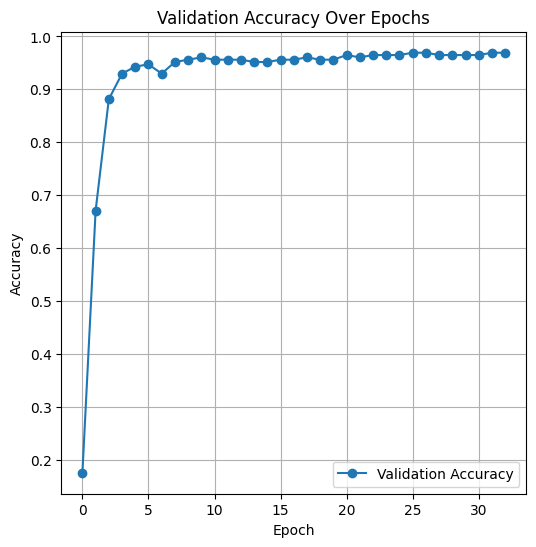

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(range(0, epochs//25+1), accuracies_gru, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [21]:

# Ensure the model is in evaluation mode

# Initialize lists to collect predictions and labels for overall metrics
all_y_pred_classes = []
all_y_test_classes = []
gru_model.eval()
with torch.no_grad():
    idx = 0
    for X_batch, y_batch in test_loader:
        # Move inputs and labels to the appropriate device
        # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        X_batch, y_batch = X_batch.to(device),y_batch.to(device)
        # Get predictions
        y_pred = gru_model(X_batch)
        y_pred_classes = torch.argmax(y_pred, dim=1)
        # Collect predictions and true labels for overall metrics
        all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
        all_y_test_classes.extend(y_batch.cpu().numpy())
accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
# Calculate overall precision, recall, and F1-score
precision = precision_score(all_y_test_classes, all_y_pred_classes,average='weighted')
recall = recall_score(all_y_test_classes, all_y_pred_classes,average='weighted')
f1 = f1_score(all_y_test_classes, all_y_pred_classes,average='weighted')
print(torch.tensor(all_y_test_classes)[0:70].reshape(-1))
print(torch.tensor(all_y_pred_classes)[0:70].reshape(-1))

print(f'Overall Accuracy: {accuracy:.2f}')
print(f'Overall Precision: {precision:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall F1 Score: {f1:.2f}')

# **Per-Class Metrics**
print("\nPer-Class Metrics:")
# Detailed classification report per class
report = classification_report(all_y_test_classes, all_y_pred_classes, digits=2)
print(report)

# Optional: Extract per-class metrics manually
class_precisions = precision_score(all_y_test_classes, all_y_pred_classes, average=None)
class_recalls = recall_score(all_y_test_classes, all_y_pred_classes, average=None)
class_f1_scores = f1_score(all_y_test_classes, all_y_pred_classes, average=None)

print(f"Class-wise Precisions: {class_precisions}")
print(f"Class-wise Recalls: {class_recalls}")
print(f"Class-wise F1 Scores: {class_f1_scores}")

tensor([2, 1, 4, 1, 4, 0, 4, 0, 3, 1, 3, 3, 3, 2, 1, 4, 2, 1, 0, 4, 1, 0, 3, 0,
        1, 2, 1, 1, 3, 0, 2, 1, 3, 3, 4, 3, 2, 2, 2, 2, 4, 1, 3, 4, 3, 4, 2, 0,
        0, 2, 2, 4, 1, 2, 3, 3, 3, 4, 1, 0, 4, 1, 3, 4, 1, 2, 0, 0, 2, 4])
tensor([2, 1, 4, 1, 4, 0, 4, 0, 3, 1, 3, 3, 3, 2, 1, 4, 2, 1, 0, 2, 1, 0, 3, 0,
        1, 2, 1, 1, 3, 0, 2, 1, 3, 3, 4, 3, 2, 2, 2, 2, 4, 1, 3, 4, 3, 4, 2, 0,
        0, 2, 2, 4, 1, 2, 3, 3, 3, 4, 1, 0, 3, 1, 3, 4, 1, 2, 0, 0, 2, 0])
Overall Accuracy: 0.95
Overall Precision: 0.95
Overall Recall: 0.95
Overall F1 Score: 0.95

Per-Class Metrics:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        41
           3       0.98      1.00      0.99        43
           4       0.93      0.88      0.90        58

    accuracy                           0.95       229
   macro avg       0.95      0.95      

## LSTM

In [28]:
import torch
import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        # self.softmax = nn.Softmax(dim=0)  # For binary classification

    def forward(self, x):
        # x: [batch_size, sequence_length, input_size]
        _, (h_n, _) = self.lstm(x)  # h_n: [num_layers, batch_size, hidden_size]
        h_n = h_n[-1]  # Take the last layer's hidden state
        output = self.fc(h_n)  # Fully connected layer
        # output = self.softmax(output)  # Apply sigmoid activation
        return output

# Parameters
input_size = 1       # Number of input features per time step
hidden_size = 128     # Number of features in the hidden state
num_layers = 5       # Number of LSTM layers
output_size = 5      # Binary classification (output is 1 probability)

# Instantiate the LSTM model
lstm_model = LSTMClassifier(input_size, hidden_size, num_layers, output_size)

# Move model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lstm_model = lstm_model.to(device)


Epoch:0, Loss: 1.6081, Accuracy:0.1754 
Epoch:25, Loss: 0.7577, Accuracy:0.5702 
Epoch:50, Loss: 0.3674, Accuracy:0.8421 
Epoch:75, Loss: 0.1163, Accuracy:0.9342 
Epoch:100, Loss: 0.1003, Accuracy:0.9342 
Epoch:125, Loss: 0.0347, Accuracy:0.9386 
Epoch:150, Loss: 0.0289, Accuracy:0.9386 
Epoch:175, Loss: 0.1854, Accuracy:0.8947 
Epoch:200, Loss: 0.0031, Accuracy:0.9430 
Epoch:225, Loss: 0.0003, Accuracy:0.9474 
Epoch:250, Loss: 0.0001, Accuracy:0.9474 
Epoch:275, Loss: 0.0001, Accuracy:0.9430 
Epoch:300, Loss: 0.0000, Accuracy:0.9430 
Epoch:325, Loss: 0.0000, Accuracy:0.9430 
Epoch:350, Loss: 0.0000, Accuracy:0.9386 
Epoch:375, Loss: 0.0000, Accuracy:0.9342 
Epoch:400, Loss: 0.0000, Accuracy:0.9342 
Epoch:425, Loss: 0.0000, Accuracy:0.9342 
Epoch:450, Loss: 0.0000, Accuracy:0.9342 
Epoch:475, Loss: 0.0000, Accuracy:0.9342 
Epoch:500, Loss: 0.0000, Accuracy:0.9342 
Epoch:525, Loss: 0.0000, Accuracy:0.9342 
Epoch:550, Loss: 0.0456, Accuracy:0.9474 
Epoch:575, Loss: 0.0011, Accuracy:0.951

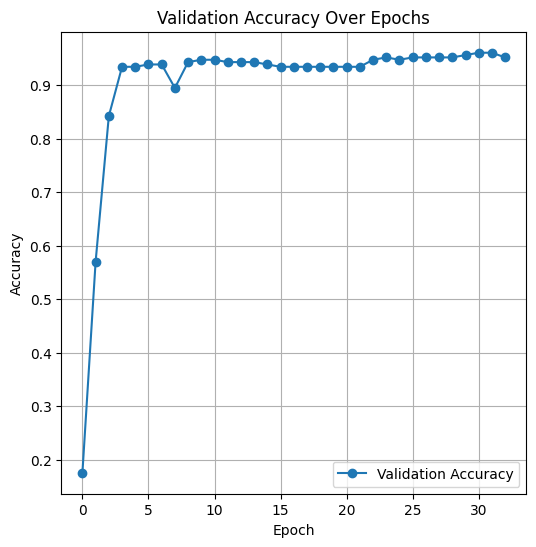

In [29]:
# Fake data
# Instantiate model, loss, and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
epochs = 801
accuracies_lstm=[]
for epoch in range(epochs):
    epoch_loss =0
    for X_batch, y_batch in train_loader:
        # Training step
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        lstm_model.train()
        optimizer.zero_grad()
        output = lstm_model(X_batch)  # Forward pass
        loss = criterion(output, y_batch)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        epoch_loss+=loss.item()
    if epoch %25==0:
        all_y_pred_classes = []
        all_y_test_classes = []
        lstm_model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # Move inputs and labels to the appropriate device
                X_batch, y_batch = X_batch.to(device),y_batch.to(device)
                # Get predictions
                y_pred = lstm_model(X_batch)
                y_pred = F.softmax(y_pred,dim=1)
                y_pred_classes = y_pred.argmax(dim=1)
                # Collect predictions and true labels for overall metrics
                all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
                all_y_test_classes.extend(y_batch.cpu().numpy())
        accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
        accuracies_lstm.append(accuracy)
        print(f"Epoch:{epoch}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy:{accuracy:.4f} ")


import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(range(0, epochs//25+1), accuracies_lstm, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [24]:

# Ensure the model is in evaluation mode

# Initialize lists to collect predictions and labels for overall metrics
all_y_pred_classes = []
all_y_test_classes = []
lstm_model.eval()
with torch.no_grad():
    idx = 0
    for X_batch, y_batch in test_loader:
        # Move inputs and labels to the appropriate device
        # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        X_batch, y_batch = X_batch.to(device),y_batch.to(device)
        # Get predictions
        y_pred = lstm_model(X_batch)
        y_pred = F.softmax(y_pred,dim=1)
        y_pred_classes =y_pred.argmax(dim=1)
        # Collect predictions and true labels for overall metrics
        all_y_pred_classes.extend(y_pred_classes.cpu().numpy())
        all_y_test_classes.extend(y_batch.cpu().numpy())
accuracy = accuracy_score(all_y_test_classes,all_y_pred_classes)
# Calculate overall precision, recall, and F1-score
precision = precision_score(all_y_test_classes, all_y_pred_classes,average='weighted')
recall = recall_score(all_y_test_classes, all_y_pred_classes,average='weighted')
f1 = f1_score(all_y_test_classes, all_y_pred_classes,average='weighted')
print(torch.tensor(all_y_test_classes)[0:70].reshape(-1))
print(torch.tensor(all_y_pred_classes)[0:70].reshape(-1))

print(f'Overall Accuracy: {accuracy:.5f}')
print(f'Overall Precision: {precision:.5f}')
print(f'Overall Recall: {recall:.5f}')
print(f'Overall F1 Score: {f1:.5f}')

# **Per-Class Metrics**
print("\nPer-Class Metrics:")
# Detailed classification report per class
report = classification_report(all_y_test_classes, all_y_pred_classes, digits=3)
print(report)

# Optional: Extract per-class metrics manually
class_precisions = precision_score(all_y_test_classes, all_y_pred_classes, average=None)
class_recalls = recall_score(all_y_test_classes, all_y_pred_classes, average=None)
class_f1_scores = f1_score(all_y_test_classes, all_y_pred_classes, average=None)

print(f"Class-wise Precisions: {class_precisions}")
print(f"Class-wise Recalls: {class_recalls}")
print(f"Class-wise F1 Scores: {class_f1_scores}")

tensor([2, 1, 4, 1, 4, 0, 4, 0, 3, 1, 3, 3, 3, 2, 1, 4, 2, 1, 0, 4, 1, 0, 3, 0,
        1, 2, 1, 1, 3, 0, 2, 1, 3, 3, 4, 3, 2, 2, 2, 2, 4, 1, 3, 4, 3, 4, 2, 0,
        0, 2, 2, 4, 1, 2, 3, 3, 3, 4, 1, 0, 4, 1, 3, 4, 1, 2, 0, 0, 2, 4])
tensor([2, 1, 4, 1, 2, 0, 4, 0, 3, 1, 3, 3, 3, 2, 1, 4, 2, 1, 0, 4, 1, 0, 3, 0,
        1, 2, 1, 1, 3, 0, 2, 1, 3, 3, 4, 3, 1, 2, 2, 2, 4, 1, 3, 4, 3, 4, 2, 0,
        0, 2, 2, 4, 1, 2, 3, 3, 3, 4, 1, 0, 3, 1, 3, 4, 1, 1, 0, 0, 2, 4])
Overall Accuracy: 0.92140
Overall Precision: 0.92302
Overall Recall: 0.92140
Overall F1 Score: 0.92107

Per-Class Metrics:
              precision    recall  f1-score   support

           0      0.851     0.930     0.889        43
           1      0.913     0.955     0.933        44
           2      0.925     0.902     0.914        41
           3      0.977     1.000     0.989        43
           4      0.942     0.845     0.891        58

    accuracy                          0.921       229
   macro avg      0.922    

## Comparison

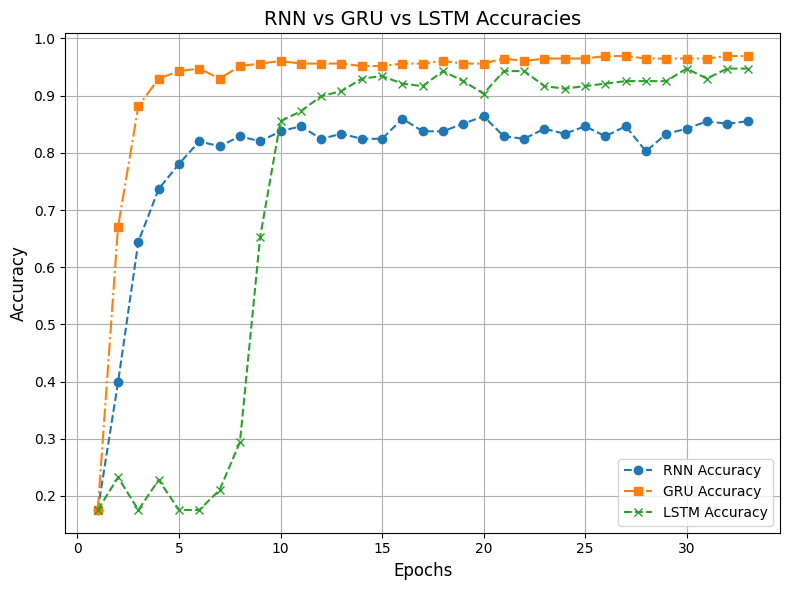

In [25]:
epochs_rnn = list(range(1, len(accuracies_rnn) + 1))
epochs_gru=list(range(1, len(accuracies_gru) + 1))
epochs_lstm=list(range(1, len(accuracies_lstm) + 1))

plt.figure(figsize=(8, 6))
plt.plot(epochs_rnn, accuracies_rnn, label='RNN Accuracy', marker='o', linestyle='--')
plt.plot(epochs_gru, accuracies_gru, label='GRU Accuracy', marker='s', linestyle='-.')
plt.plot(epochs_lstm, accuracies_lstm, label='LSTM Accuracy', marker='x', linestyle='--')

# Adding labels and title
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('RNN vs GRU vs LSTM Accuracies', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
import numpy as np
import torch
import random
from tqdm import trange

class RBM:

	def __init__(self, n_visible, n_hidden, lr=0.001, epochs=5, mode='bernoulli', batch_size=32, k=3, optimizer='adam', gpu=False, savefile=None, early_stopping_patience=5):
		self.mode = mode # bernoulli or gaussian RBM
		self.n_hidden = n_hidden #  Number of hidden nodes
		self.n_visible = n_visible # Number of visible nodes
		self.lr = lr # Learning rate for the CD algorithm
		self.epochs = epochs # Number of iterations to run the algorithm for
		self.batch_size = batch_size
		self.k = k
		self.optimizer = optimizer
		self.beta_1=0.9
		self.beta_2=0.999
		self.epsilon=1e-07
		self.m = [0, 0, 0]
		self.v = [0, 0, 0]
		self.m_batches = {0:[], 1:[], 2:[]}
		self.v_batches = {0:[], 1:[], 2:[]}
		self.savefile = savefile
		self.early_stopping_patience = early_stopping_patience
		self.stagnation = 0
		self.previous_loss_before_stagnation = 0
		self.progress = []

		if torch.cuda.is_available() and gpu==True:  
			dev = "cuda:0" 
		else:  
			dev = "cpu"  
		self.device = torch.device(dev)

		# Initialize weights and biases
		std = 4 * np.sqrt(6. / (self.n_visible + self.n_hidden))
		self.W = torch.normal(mean=0, std=std, size=(self.n_hidden, self.n_visible))
		self.vb = torch.zeros(size=(1, self.n_visible), dtype=torch.float32)
		self.hb = torch.zeros(size=(1, self.n_hidden), dtype=torch.float32)

		self.W = self.W.to(self.device)
		self.vb = self.vb.to(self.device)
		self.hb = self.hb.to(self.device)
		
	def sample_h(self, x):
		wx = torch.mm(x, self.W.t())
		activation = wx + self.hb
		p_h_given_v = torch.sigmoid(activation)
		if self.mode == 'bernoulli':
			return p_h_given_v, torch.bernoulli(p_h_given_v)
		else:
			return p_h_given_v, torch.add(p_h_given_v, torch.normal(mean=0, std=1, size=p_h_given_v.shape))

	def sample_v(self, y):
		wy = torch.mm(y, self.W)
		activation = wy + self.vb
		p_v_given_h =torch.sigmoid(activation)
		if self.mode == 'bernoulli':
			return p_v_given_h, torch.bernoulli(p_v_given_h)
		else:
			return p_v_given_h, torch.add(p_v_given_h, torch.normal(mean=0, std=1, size=p_v_given_h.shape))
	
	def adam(self, g, epoch, index):
		self.m[index] = self.beta_1 * self.m[index] + (1 - self.beta_1) * g
		self.v[index] = self.beta_2 * self.v[index] + (1 - self.beta_2) * torch.pow(g, 2)

		m_hat = self.m[index] / (1 - np.power(self.beta_1, epoch)) + (1 - self.beta_1) * g / (1 - np.power(self.beta_1, epoch))
		v_hat = self.v[index] / (1 - np.power(self.beta_2, epoch))
		return m_hat / (torch.sqrt(v_hat) + self.epsilon)

	def update(self, v0, vk, ph0, phk, epoch):
		dW = (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
		dvb = torch.sum((v0 - vk), 0)
		dhb = torch.sum((ph0 - phk), 0)

		if self.optimizer == 'adam':
			dW = self.adam(dW, epoch, 0)
			dvb = self.adam(dvb, epoch, 1)
			dhb = self.adam(dhb, epoch, 2)

		self.W += self.lr * dW
		self.vb += self.lr * dvb
		self.hb += self.lr * dhb

	def train(self, dataset):
		dataset = dataset.to(self.device)
		learning = trange(self.epochs, desc=str('Starting...'))
		for epoch in learning:
			train_loss = 0
			counter = 0
			for batch_start_index in range(0, dataset.shape[0]-self.batch_size, self.batch_size):
				vk = dataset[batch_start_index:batch_start_index+self.batch_size]
				v0 = dataset[batch_start_index:batch_start_index+self.batch_size]
				ph0, _ = self.sample_h(v0)

				for k in range(self.k):
					_, hk = self.sample_h(vk)
					_, vk = self.sample_v(hk)
				phk, _ = self.sample_h(vk)
				self.update(v0, vk, ph0, phk, epoch+1)
				train_loss += torch.mean(torch.abs(v0-vk))
				counter += 1
			
			self.progress.append(train_loss.item()/counter)
			details = {'epoch': epoch+1, 'loss': round(train_loss.item()/counter, 4)}
			learning.set_description(str(details))
			learning.refresh()
			
			if train_loss.item()/counter > self.previous_loss_before_stagnation and epoch>self.early_stopping_patience+1:
				self.stagnation += 1
				if self.stagnation == self.early_stopping_patience-1:
					learning.close()
					print("Not Improving the stopping training loop.")
					break
			else:
				self.previous_loss_before_stagnation = train_loss.item()/counter
				self.stagnation = 0
		learning.close()
		if self.savefile is not None:
			model = {'W':self.W, 'vb':self.vb, 'hb':self.hb}
			torch.save(model, self.savefile)

	def load_rbm(self, savefile):
		loaded = torch.load(savefile)
		self.W = loaded['W']
		self.vb = loaded['vb']
		self.hb = loaded['hb']

		self.W = self.W.to(self.device)
		self.vb = self.vb.to(self.device)
		self.hb = self.hb.to(self.device)



def trial_dataset():
	dataset = []
	for _ in range(1000):
		t = []
		for _ in range(10):
			if random.random()>0.75:
				t.append(0)
			else:
				t.append(1)
		dataset.append(t)

	for _ in range(1000):
		t = []
		for _ in range(10):
			if random.random()>0.75:
				t.append(1)
			else:
				t.append(0)
		dataset.append(t)

	dataset = np.array(dataset, dtype=np.float32)
	np.random.shuffle(dataset)
	dataset = torch.from_numpy(dataset)
	return dataset

In [32]:
import numpy as np
import torch
import random
from tqdm import trange

class DBN:
	def __init__(self, input_size, layers, mode='bernoulli', gpu=False, k=5, savefile=None):
		self.layers = layers
		self.input_size = input_size
		self.layer_parameters = [{'W':None, 'hb':None, 'vb':None} for _ in range(len(layers))]
		self.k = k
		self.mode = mode
		self.savefile = savefile

	def sample_v(self, y, W, vb):
		wy = torch.mm(y, W)
		activation = wy + vb
		p_v_given_h =torch.sigmoid(activation)
		if self.mode == 'bernoulli':
			return p_v_given_h, torch.bernoulli(p_v_given_h)
		else:
			return p_v_given_h, torch.add(p_v_given_h, torch.normal(mean=0, std=1, size=p_v_given_h.shape))

	def sample_h(self, x, W, hb):
		wx = torch.mm(x, W.t())
		activation = wx + hb
		p_h_given_v = torch.sigmoid(activation)
		if self.mode == 'bernoulli':
			return p_h_given_v, torch.bernoulli(p_h_given_v)
		else:
			return p_h_given_v, torch.add(p_h_given_v, torch.normal(mean=0, std=1, size=p_h_given_v.shape))

	def generate_input_for_layer(self, index, x):
		if index>0:
			x_gen = []
			for _ in range(self.k):
				x_dash = x.clone()
				for i in range(index):
					_, x_dash = self.sample_h(x_dash, self.layer_parameters[i]['W'], self.layer_parameters[i]['hb'])
				x_gen.append(x_dash)

			x_dash = torch.stack(x_gen)
			x_dash = torch.mean(x_dash, dim=0)
		else:
			x_dash = x.clone()
		return x_dash

	def train_DBN(self, x):
		for index, layer in enumerate(self.layers):
			if index==0:
				vn = self.input_size
			else:
				vn = self.layers[index-1]
			hn = self.layers[index]

			rbm = RBM(vn, hn, epochs=100, mode='bernoulli', lr=0.0005, k=10, batch_size=128, gpu=True, optimizer='adam', early_stopping_patience=10)
			x_dash = self.generate_input_for_layer(index, x)
			rbm.train(x_dash)
			self.layer_parameters[index]['W'] = rbm.W.cpu()
			self.layer_parameters[index]['hb'] = rbm.hb.cpu()
			self.layer_parameters[index]['vb'] = rbm.vb.cpu()
			print("Finished Training Layer:", index, "to", index+1)
		if self.savefile is not None:
			torch.save(self.layer_parameters, self.savefile)

	def reconstructor(self, x):
		x_gen = []
		for _ in range(self.k):
			x_dash = x.clone()
			for i in range(len(self.layer_parameters)):
				_, x_dash = self.sample_h(x_dash, self.layer_parameters[i]['W'], self.layer_parameters[i]['hb'])
			x_gen.append(x_dash)
		x_dash = torch.stack(x_gen)
		x_dash = torch.mean(x_dash, dim=0)

		y = x_dash

		y_gen = []
		for _ in range(self.k):
			y_dash = y.clone()
			for i in range(len(self.layer_parameters)):
				i = len(self.layer_parameters)-1-i
				_, y_dash = self.sample_v(y_dash, self.layer_parameters[i]['W'], self.layer_parameters[i]['vb'])
			y_gen.append(y_dash)
		y_dash = torch.stack(y_gen)
		y_dash = torch.mean(y_dash, dim=0)

		return y_dash, x_dash

	def initialize_model(self):
		print("The Last layer will not be activated. The rest are activated using the Sigoid Function")
		modules = []
		for index, layer in enumerate(self.layer_parameters):
			modules.append(torch.nn.Linear(layer['W'].shape[1], layer['W'].shape[0]))
			if index < len(self.layer_parameters) - 1:
				modules.append(torch.nn.Softmax())
		model = torch.nn.Sequential(*modules)

		for layer_no, layer in enumerate(model):
			if layer_no//2 == len(self.layer_parameters)-1:
				break
			if layer_no%2 == 0:
				model[layer_no].weight = torch.nn.Parameter(self.layer_parameters[layer_no//2]['W'])
				model[layer_no].bias = torch.nn.Parameter(self.layer_parameters[layer_no//2]['hb'])

		return model

# Create dataset
# X, y = generate_labeled_dataset()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create dataset
# X, y = generate_labeled_dataset()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DBN
dbn = DBN(input_size=X_train_tensor.shape[1], layers=[72, 2*72-1,2*72-1], mode='none', k=5)
dbn.train_DBN(X_train_tensor)

# Create a classification model
model = dbn.initialize_model()
# Append final classification layer
# model.add_module("second_final_layer", nn.Linear(dbn.layers[-1], 5))
model.add_module("final_layer", nn.Linear(dbn.layers[-1], 5))  # 5 classes
# model.add_module("softmax", nn.Softmax(dim=1))

# Train the classifier
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
accuracies_selfdetect= []
# Training loop
num_epochs = 801
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if(epoch%25 == 0):
        with torch.no_grad():
            model.eval()
            y_pred = model(X_val_tensor)
            y_pred = F.softmax(y_pred,dim=1)
            y_pred_classes = y_pred.argmax(dim=1)
            accuracy = accuracy_score(y_val_tensor.numpy(), y_pred_classes.numpy())
            accuracies_selfdetect.append(accuracy)
        print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item()}, Accuracy:{accuracy:.4f} ")

# Evaluate the model
epochs_ = len(accuracies_selfdetect)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot( range(0, epochs_), accuracies_selfdetect, marker='o', label='Self-detection model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Starting...:   0%|          | 0/100 [00:00<?, ?it/s]


RuntimeError: self must be a matrix

In [20]:
X_train_tensor.shape

torch.Size([4104, 48, 1])

In [36]:
import time

def measure_inference_time(model, input_data, device, num_runs=100,model_name='None',):
    """
    Measures inference time and FPS for a given model.

    Args:
        model: The model to evaluate.
        input_data: A sample input tensor for the model.
        num_runs: Number of inference runs for averaging.

    Returns:
        avg_time_per_inference: Average time per inference (in milliseconds).
        fps: Frames per second (FPS).
    """
    if model_name == 'DBN':
        for _ in range(10):
            _ = model(input_data)

            # Measure inference time
        start_time = time.time()
        for _ in range(num_runs):
            _ = model(input_data)
        end_time = time.time()

    else:
        model = model.to(device)
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            # Warm-up runs
                
            for _ in range(10):
                _ = model(input_data.to(device))
    
                # Measure inference time
            start_time = time.time()
            for _ in range(num_runs):
                _ = model(input_data.to(device))
            end_time = time.time()
       

    total_time = (end_time - start_time)  # Total time in seconds
    avg_time_per_inference = (total_time / num_runs) * 1000  # in milliseconds
    fps = num_runs / total_time
    return avg_time_per_inference
    
for X_batch, y_batch in test_loader:
    # X_batch=X_batch.to(device)
    # print(X_batch.unsqueeze(2).shape)
    # break
    time_rnn = measure_inference_time(rnn_model, X_batch,device=device)
    time_gru = measure_inference_time(gru_model, X_batch,device=device)
    time_lstm = measure_inference_time(lstm_model, X_batch,device=device)
    # time_dbn = measure_inference_time(model_dbn,X_batch,device=device, model_name='DBN' )
    # print(time_rnn,time_gru,time_lstm,time_dbn)
    break

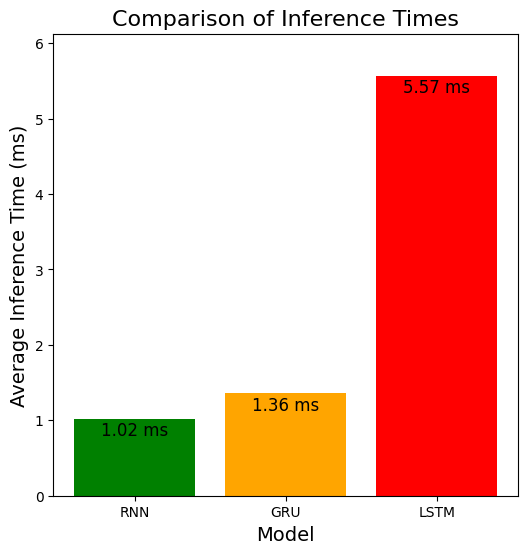

In [38]:
import matplotlib.pyplot as plt
import time

# Assuming `time_rnn`, `time_gru`, `time_lstm`, and `time_dbn` are calculated for one batch
model_names = ['RNN', 'GRU', 'LSTM']
inference_times = [time_rnn, time_gru, time_lstm]

# Plotting the bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(model_names, inference_times, color=['green', 'orange', 'red'])

# Adding labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Average Inference Time (ms)', fontsize=14)
plt.title('Comparison of Inference Times', fontsize=16)

# Display values slightly below the top of each bar
for bar, time in zip(bars, inference_times):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * max(inference_times), 
             f"{time:.2f} ms", ha='center', va='bottom', fontsize=12, color='black')

# Adjust plot to avoid clipping
plt.ylim(0, max(inference_times) * 1.1)

# Show the chart
plt.show()


In [42]:
import torch

def measure_memory_usage(model, input_data, device,model_name='None'):
    """
    Measures memory usage for a given model during inference.

    Args:
        model: The model to evaluate.
        input_data: A sample input tensor for the model.
        device: The device on which to run the model (e.g., 'cuda' or 'cpu').

    Returns:
        max_memory_allocated: Peak memory usage during inference (in MB).
    """
      # Clear cache to avoid overestimation
    if model_name == 'DBN':
        # for _ in range(10):
        #     _ = model(input_data)

        #     # Measure inference time
        # start_time = time.time()
        # for _ in range(num_runs):
        #     _ = model(input_data)
        # end_time = time.time()
        # # Warm-up
        with torch.no_grad():
            _ = model(input_data)
    
        # Measure memory usage
        torch.cuda.reset_peak_memory_stats(device)
        with torch.no_grad():
            _ = model(input_data)

    else:
        model = model.to(device)
        model.eval()  # Set model to evaluation mode
        torch.cuda.empty_cache()
        # for _ in range(10):
        #     _ = model(input_data)

        #     # Measure inference time
        # start_time = time.time()
        # for _ in range(num_runs):
        #     _ = model(input_data.unsqueeze(2).to(device))
        # end_time = time.time()
        # Warm-up
        with torch.no_grad():
            _ = model(input_data.to(device))
    
        # Measure memory usage
        torch.cuda.reset_peak_memory_stats(device)
        with torch.no_grad():
            _ = model(input_data.to(device))
    max_memory_allocated = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # Convert to MB
    
    return max_memory_allocated
for X_batch, y_batch in test_loader:
    # time_rnn = measure_inference_time(rnn_model, X_batch, device=device)
    memory_rnn = measure_memory_usage(rnn_model, X_batch, device=device)

    # time_gru = measure_inference_time(gru_model, X_batch, device=device)
    memory_gru = measure_memory_usage(gru_model, X_batch, device=device)

    # time_lstm = measure_inference_time(lstm_model, X_batch, device=device)
    memory_lstm = measure_memory_usage(lstm_model, X_batch, device=device)

    # time_dbn = measure_inference_time(model_dbn, X_batch, device=device, model_name='DBN')
    # memory_dbn = measure_memory_usage(model_dbn, X_batch, device=device,model_name='DBN')

    # Display results
    print("Model\t\tTime (ms)\tMemory (MB)")
    print(f"RNN\t\t{time_rnn:.2f}\t\t{memory_rnn:.2f}")
    print(f"GRU\t\t{time_gru:.2f}\t\t{memory_gru:.2f}")
    print(f"LSTM\t\t{time_lstm:.2f}\t\t{memory_lstm:.2f}")
    # print(f"DBN\t\t{time_dbn:.2f}\t\t{memory_dbn:.2f}")
    break

Model		Time (ms)	Memory (MB)
RNN		1.02		92.20
GRU		1.36		112.96
LSTM		5.57		140.83


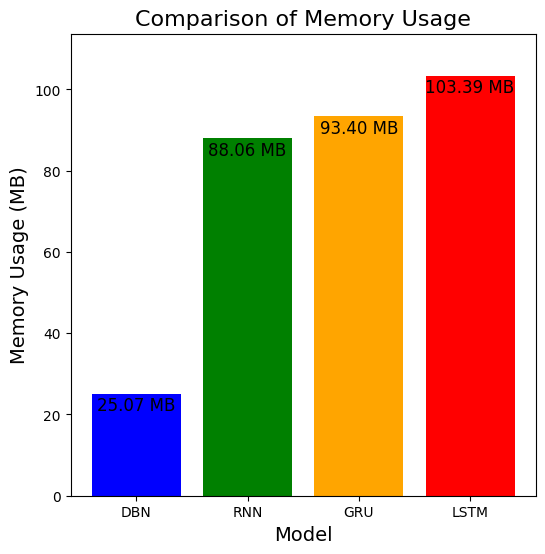

In [72]:
import matplotlib.pyplot as plt

# Assuming `memory_rnn`, `memory_gru`, `memory_lstm`, and `memory_dbn` are calculated for one batch
model_names = ['DBN', 'RNN', 'GRU', 'LSTM']
memory_usages = [memory_dbn, memory_rnn, memory_gru, memory_lstm]

# Plotting the bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(model_names, memory_usages, color=['blue', 'green', 'orange', 'red'])

# Adding labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Memory Usage (MB)', fontsize=14)
plt.title('Comparison of Memory Usage', fontsize=16)

# Display values on top of each bar
for bar, memory in zip(bars, memory_usages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * max(memory_usages), 
             f"{memory:.2f} MB", ha='center', va='bottom', fontsize=12, color='black')

# Adjust plot to avoid clipping
plt.ylim(0, max(memory_usages) * 1.1)

# Show the chart
plt.show()


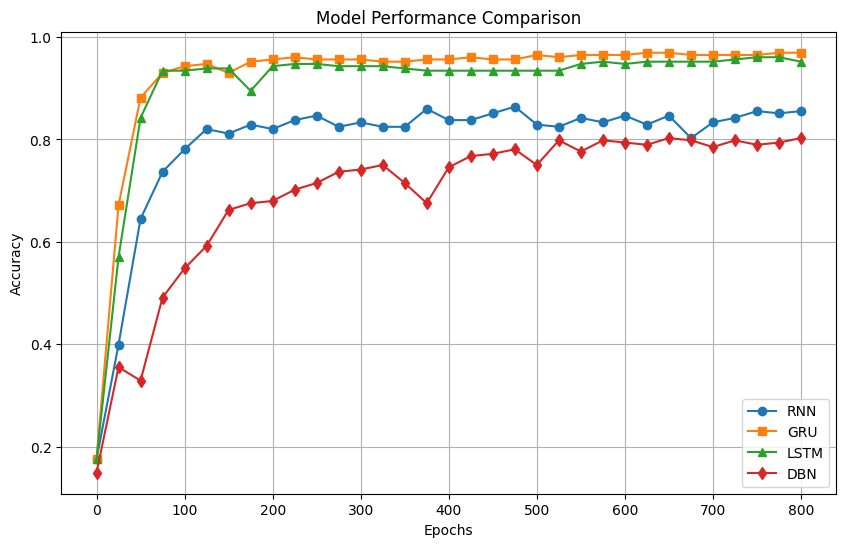

In [30]:
rnn_data = [
    (0, 0.1754), (25, 0.3991), (50, 0.6447), (75, 0.7368), (100, 0.7807),
    (125, 0.8202), (150, 0.8114), (175, 0.8289), (200, 0.8202), (225, 0.8377),
    (250, 0.8465), (275, 0.8246), (300, 0.8333), (325, 0.8246), (350, 0.8246),
    (375, 0.8596), (400, 0.8377), (425, 0.8377), (450, 0.8509), (475, 0.8640),
    (500, 0.8289), (525, 0.8246), (550, 0.8421), (575, 0.8333), (600, 0.8465),
    (625, 0.8289), (650, 0.8465), (675, 0.8026), (700, 0.8333), (725, 0.8421),
    (750, 0.8553), (775, 0.8509), (800, 0.8553)
]

gru_data = [
    (0, 0.1754), (25, 0.6711), (50, 0.8816), (75, 0.9298), (100, 0.9430),
    (125, 0.9474), (150, 0.9298), (175, 0.9518), (200, 0.9561), (225, 0.9605),
    (250, 0.9561), (275, 0.9561), (300, 0.9561), (325, 0.9518), (350, 0.9518),
    (375, 0.9561), (400, 0.9561), (425, 0.9605), (450, 0.9561), (475, 0.9561),
    (500, 0.9649), (525, 0.9605), (550, 0.9649), (575, 0.9649), (600, 0.9649),
    (625, 0.9693), (650, 0.9693), (675, 0.9649), (700, 0.9649), (725, 0.9649),
    (750, 0.9649), (775, 0.9693), (800, 0.9693)
]

lstm_data = [
    (0, 0.1754), (25, 0.5702), (50, 0.8421), (75, 0.9342), (100, 0.9342),
    (125, 0.9386), (150, 0.9386), (175, 0.8947), (200, 0.9430), (225, 0.9474),
    (250, 0.9474), (275, 0.9430), (300, 0.9430), (325, 0.9430), (350, 0.9386),
    (375, 0.9342), (400, 0.9342), (425, 0.9342), (450, 0.9342), (475, 0.9342),
    (500, 0.9342), (525, 0.9342), (550, 0.9474), (575, 0.9518), (600, 0.9474),
    (625, 0.9518), (650, 0.9518), (675, 0.9518), (700, 0.9518), (725, 0.9561),
    (750, 0.9605), (775, 0.9605), (800, 0.9518)
]

paper_model = [
    (0, 0.1491), (25, 0.3553), (50, 0.3289), (75, 0.4912), (100, 0.5482),
    (125, 0.5921), (150, 0.6623), (175, 0.6754), (200, 0.6798), (225, 0.7018),
    (250, 0.7149), (275, 0.7368), (300, 0.7412), (325, 0.7500), (350, 0.7149),
    (375, 0.6754), (400, 0.7456), (425, 0.7675), (450, 0.7719), (475, 0.7807),
    (500, 0.7500), (525, 0.7982), (550, 0.7763), (575, 0.7982), (600, 0.7939),
    (625, 0.7895), (650, 0.8026), (675, 0.7982), (700, 0.7851), (725, 0.7982),
    (750, 0.7895), (775, 0.7939), (800, 0.8026)
]

def unpack_data(data):
    return zip(*data)

rnn_x, rnn_y = unpack_data(rnn_data)
gru_x, gru_y = unpack_data(gru_data)
lstm_x, lstm_y = unpack_data(lstm_data)
paper_x, paper_y = unpack_data(paper_model)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rnn_x, rnn_y, label='RNN', marker='o')
plt.plot(gru_x, gru_y, label='GRU', marker='s')
plt.plot(lstm_x, lstm_y, label='LSTM', marker='^')
plt.plot(paper_x, paper_y, label='DBN', marker='d')

plt.title('Model Performance Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()